In [ ]:

!pip install pyLDAvis

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

5 -7.920499783066267 0.5035468047746186
   Document_No  ...                                               Text
0            0  ...                                                 []
1            1  ...            [pengendara, motor, hadang, penampakan]
2            2  ...   [mahluk, terekam, kamera, penampakan, merinding]
3            3  ...               [kecil, terekam, kamera, penampakan]
4            4  ...                         [muncul, lift, penampakan]
5            5  ...            [penampakan, kejadian, terekam, kamera]
6            6  ...            [terekam, jelas, penampakan, merinding]
7            7  ...                   [muncul, pos, ronda, penampakan]
8            8  ...                 [seram, atap, mushola, penampakan]
9            9  ...  [viral, pria, tidur, masjid, pindah, oleh, pen...

[10 rows x 5 columns]
Dominant_Topic
0.0    287
1.0    306
2.0    321
3.0    419
4.0    364
dtype: int64


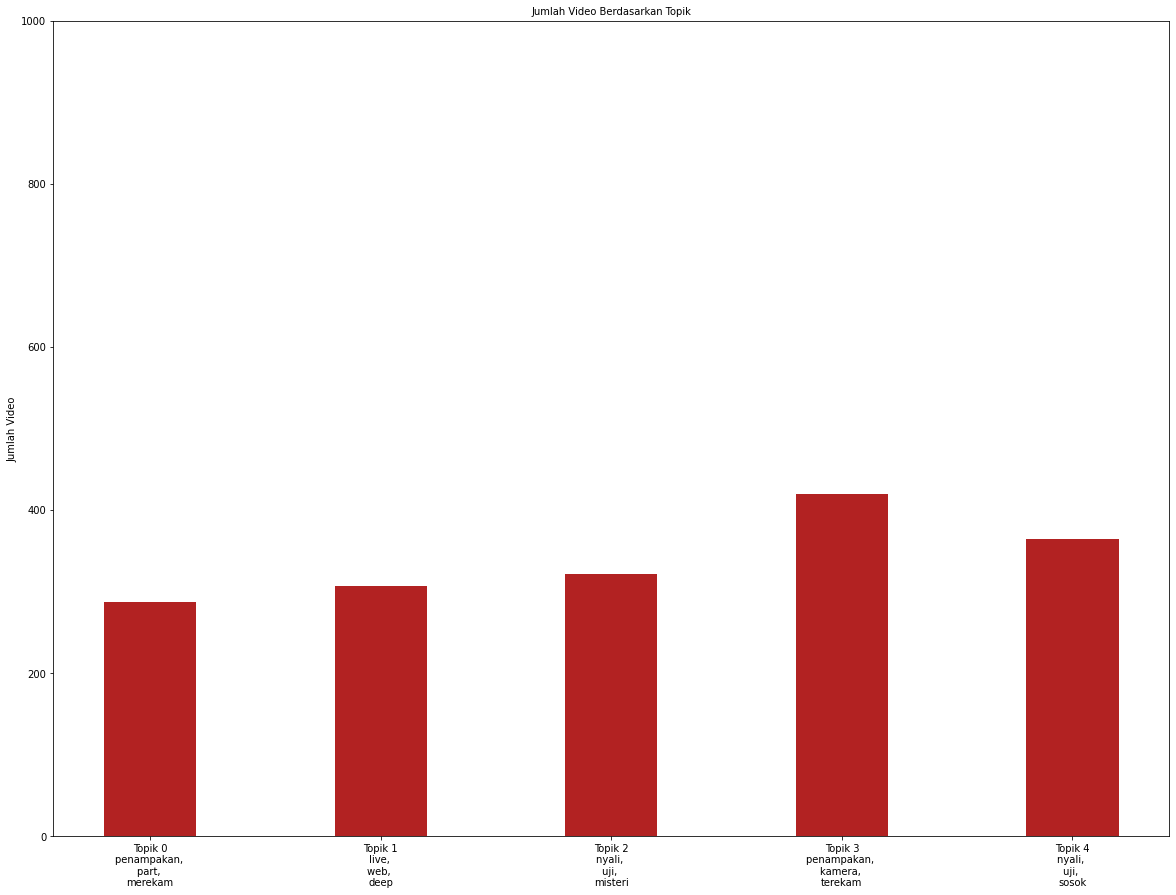

In [ ]:
# -*- coding: utf-8 -*-
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from gensim.models.coherencemodel import CoherenceModel
import re
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import pickle 
import numpy as np, pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

random_state = 0 

doc_set = """

PENGENDARA MOTOR DI HADANG KUNTILANAK     VIDEO PENAMPAKAN HANTU YG MENGERIKAN
MAHLUK MENGERIKAN TEREKAM KAMERA    PENAMPAKAN HANTU YG BIKIN MERINDING
HANTU ANAK KECIL TEREKAM KAMERA   VIDEO PENAMPAKAN HANTU YG MENGERIKAN
KUNTILANK MUNCUL DI LIFT    PENAMPAKAN HANTU YG MENGERIKAN
PENAMPAKAN DAN KEJADIAN MENGERIKAN YG TEREKAM KAMERA
HANTU TEREKAM JELAS     PENAMPAKAN HANTU YG BIKIN MERINDING
HANTU MUNCUL DI POS RONDA     VIDEO PENAMPAKAN HANTU YG MENGERIKAN
HANTU SERAM DI ATAP MUSHOLA     PENAMPAKAN HANTU YG MENGERIKAN
VIRAL PRIA TIDUR DI MASJID DI PINDAH OLEH JIN     PENAMPAKAN HANTU DAN KEJADIAN MENGERIKAN
KEJADIAN MENGERIKAN DAN PENAMPAKAN HANTU YG BIKIN MERINDING
PRIA INI DI SERET HANTU    PENAMPAKAN HANTU DAN KEJADIAN ANEH YG TEREKAM KAMERA
VIRAL BOBON SANTOSO DI DATANGI KUNTILANAK MERAH    PENAMPAKAN HANTU YG MENGERIKAN
PENAMPAKAN ZOMBI ASLI     VIDEO PENAMPAKAN DAN HAL ANEH YG TEREKAM KAMERA
REKAMAN CCTV YG MENGERIKAN DAN BIKIN MERINDING
LIHAT APA YG TERJADI SAMA WANITA MISTERIUS INI   VIDEO MENGERIKAN YG TEREKAM KAMERA
ASLI BIKIN MERINDING    PENAMPAKAN HANTU PALING SERAM
DI KIRA ORANG G4NTUN9 DIRI TAPI TERNYATA      YOUTUBER YG MEREKAM HAL MENGERIKAN
DI KEJAR PSIK0PAT     VIDEO MENGERIKAN YG TEREKAM KAMERA
TUYUL TERTANGKAP KAMERA    VIDEO PENAMPAKAN HANTU YG PALING MENGERIKAN
VIDEO PENAMPAKAN HANTU YG PALING SERAM
VIDEO MENGERIKAN DARI INSTAGRAM PART 
YOUTUBER YG MEREKAM HAL MENGERIKAN PART 
DI KEJAR POCONG    PENAMPAKAN HANTU PALING MENGERIKAN
VIDEO PENAMPAKAN SERAM YG BIKIN MERINDING
MAHLUK ANEH TEREKAM DI JALANAN   VIDEO PENAMPAKAN SOSOK ANEH DAN MENGERIKAAN
BIKIN MERINDING   PENAMPAKAN HANTU YG PALING MENYERAMKAN
PENAMAPAKAN KUNTILANAK TERBANG   VIDEO PENAMPAKAN HANTU YG TEREKAM KAMERA
MAHLUK SERAM TEREKAM KAMERA   PENAMPAKAN HANTU YG BIKIN MERINDING
VIDEO SERAM YG BIKIN MERINDING
VIDEO SERAM DARI TIKTOK
DI DATANGI POCONG SAAT MAKAN    PENAMPAKAN HANTU YG MENGERIKAN
PENAMPAKAN HANTU YG TIDAK SENGAJA TEREKAM KAMERA
YOUTUBER YG MEREKAM HAL MENGERIKAN PART 
TIBA TIBA MUNCUL DI JENDELA    PENAMPAKAN HANTU TERSERAM YG TEREKAM KAMERA
HANTU NENEK SERAM BIKIN MERINDING   NONTON SHORT MOVIE HORROR TERSERAM
VIDEO MENGERIKAN YG DI UNGGAH DI YOUTUBE
REKAMAN PENAMPAKAN HANTU YG BIKIN MERINDING
VIDEO MENGERIKAN YG TEREKAM KAMERA
VIDEO MENGERIKAN DARI PARA YOUTUBER
VIDEO MENGERIKAN DARI INSTAGRAM PART 
CUPLIKAN PENAMPAKAN HANTU SERAM DAN KEJADIAN ANEH
PENAMPAKAN HANTU PALING MEMGERIKAN YG TEREKAM KAMERA
VIDEO PENAMPAKAN BADUT MENGERIKAN DAN MERESAHKAN PART 
VIDEO MENGERIKAN YG TEREKAM KAMERA
YOUTUBER YG MEREKAM HAL MENGERIKAN PART 
SERAM    VIDEO MENGERIKAN YG TEREKAM KAMERA
HANTU MENERKAM DARI BELAKANG   YOUTUBER YG MEREKAM HAL MENGERIKAN PART 
TIBA2 MUNCUL DI BELAKANG   PENAMPAKAN HANTU YG TEREKAM KAMERA
VIDEO SERAM DARI FACEBOOK
KEJADIAN MENGERIKAN YANG TEREKAM KAMERA
PENAMPAKAN KUNTILANAK NGESOT  BERIKUT  VIDEO PENAMPAKAN HANTU YG MENYERAMKAN
PENAMPAKAN SOSOK ANEH MERANGKAK DI JALAN   KEJADIAN MENYERAMKAN YG TEREKAM KAMERA
VIDEO TIKTOK YG MENGERIKAN PART 
VIDEO PENAMPAKAN DAN HAL SERAM YG DI REKAM YOUTUBER
REMAJA INI DI HADANG HANTU   PENAMPAKAN YANG TEREKAM CCTV
VIDEO PENAMPAKAN DAN GANGGUAN HANTU SAAT LEMBUR
YOUTUBER YG MEREKAM HAL MENGERIKAN PART 
PENAMPAKAN HANTU YG TIDAK SENGAJA TEREKAM KAMERA
UNTUNG DI REKAM    VIDEO MISTERIUS YG MENYERAMKAN
BIKIN MERINDING  PENAMPAKAN HANTU YG MENYERAMKAN
REKAMAN MEMGERIKAN DI HUTAN
TIDAK SENGAJA TEREKAM    PENAMPAKAN HANTU YG TIDAK SENGAJA TEREKAM KAMERA
TERLALU BAR BAR    PENAMPAKAN HANTU INDONESIA TERJELAS
PENAMPAKAN HANTU ARAB YG MENGERIKAN PART 
HANTU MERAYAP     VIDEO PENAMPAKAN MENGERIKAN YG TEREKAM KAMERA
REKAMAN CCTV YG ANEH DAN SERAM
HANTU NYA NGEGANTUNG    REACTION SHORT MOVIE HORROR
MALM JUM AT HOROR     VIDEO MENGERIKAN DARI TIK TOK
LAGI NONTON VIDEO WIK WIK GAK SADAR ADA POCONG IKUT NONTON    PENAMMPAKAN HANTU YG MENGERIKAN
PENAMPAKAN BADUT MENGERIKAN DAN MERESAHKAN PART 
VIDEO PENAMPAKAN MAHLUK ANEH DAN MENGERIKAN
VIDEO TIKTOK YG PALING MENGERIKAN PART 
VIDEO PENAMPAKAN BADUT MENGERIKAN DAN MERESAHKAN PART 
ANJAY SERAM    VIDEO PENAMPAKAN DAN KEJADIAN MENGERIKAN
PSIK0PAT CANTIK  ISABELLA GUZMAN
VIDEO PENAMPAKAN HANTU YG PALING MENGERIKAN
YOUTUBER YG MEREKAM HAL MENGERIKAN PART 
SERAM  VIDEO PENAMPAKAN HANTU DARI INDONESIA
VIDEO MENGERIKAN DARI INSTAGRAM PART 
VIDEO MENGERIKAN DARI INSTAGRAM
VIDEO MENGERIKAN YG DI REKAM YOUTUBER
VIDEO PENAMPAKAN HANTU YG PALING SERAM
WOW SEREM BANNGET  AWAS JANTUNGAN
ORANG INI MENCIPTAKAN MONSTER  MAHLUK HOMONCULUS
BONEKA HANTU YG BERGERAK SENDIRI
VIDEO TIKTOK YG SANGAT MENGERIKAN PART 
INDO BARBAR  PENAMPAKAN HANTU YG DI REKAM YOUTUBER INDONESIA TERBARBAR SEDUNIA
YOUTUBER YG MEREKAM HAL MENYERAMKAN PART 
PENAMPAKAN BADUT MEMNYERAMKAN DAN MERESAHKAN PART 
VIDEO SERAM DARI SUBSCRIBER PART 
VIDEO TIKTOK YG MENGERIKAN PART 
VIDEO PENAMPAKAN SERAM DARI SUBSCRIBER
PENAMPAKAN HANTU ARAB YG PALING MENGERIKAN
PENAMPAKAN HANTU JEPANG PART 
REACTION HOROR TERSERAM PART 
YOUTUBER YG MEREKAM HAL MENGERIKAN PART 
REACTION HOROR TERSERAM
YOUTUBER YG MEREKAM HAL MENGERIKAN PART 
VIDEO PENAMPAKAN PALING MENGERIKAN YG TEREKAM KAMERA
PENAMPAKAN MAHLUK ANEH DAN MENGERIKAN
PENAMPAKAN BADUT MENGERIKAN DAN MERESAHKAN PART 
JUMPSCARE CHALLENGE  YUK KITA KAGET KAGETAN BARENG
YOUTUBER YG MEREKAM ORG2 MISTERIUS DAN MENGERIKAN
PENAMPAKAN BADUT MENGERIKAN DAN MERESAHKAN PART 
YOUTUBER YG MEREKAM HAL MENGERIKAN PART 
PENAMPAKAN HANTU JEPANG PART 
VIDEO PENAMPAKAN SOSOK ANEH DAN MENGERIKAN
PENAMPAKAN HANTU JEPANG PART 
YOUTUBER ARAB YG MEREKAM HAL MENGERIKAN
VIDEO TIKTOK YG MENGERIKAN PART2
PENELUSURAN YG MEREKAM HAL MENGERIKAN
PENAMPAKAN HANTU PALING MENGERIKAN
VIDEO MENGERIKAN DARI PARA YOUTUBERS
YOUTUBER YG MEREKAM HAL MENGERIKAN PART 
PENAMPAKAN HANTU ARAB YG MENGERIKAN
PENAMPAKAN BADUT MENGERIKAN DAN MERESAHKAN PART 
VIDEO MENYERAMKAN YG TEREKAM KAMERA
VIDEO ANEH YG SANGAT SULIT DI JELASKAN
VIDEO PENAMPAKAN HANTU MENGERIKAN
YOUTUBER YG MEREKAM HAL MENGERIKAN PART 
REKAMAN KAMERA MOBIL YG MENGERIKAN
PENAMPAKAN BADUT MENGERIKAN DAN MERESAHKAN PART 
PENAMPAKAN HANTU JEPANG PART 
VIDEO PENAMPAKAN HANTU BIKIN MERINDING
REKAMAN PANGGILAN  YG MENGERIKAN
YOUTUBER YG MEREKAM HAL MENGERIKAN PART 
PENAMPAKAN HANTU JEPANG PART 
YOUTUBER YG MEREKAM HAL MENGERIKAN
PENAMPAKAN HANTU YG BAKAL BIKIN KALIAN MERINDING
VIDEO ANEH DAN MISTERIUS
PENAMPAKAN BADUT MENGERIKAN DAN MERESAHKAN PART 
WOW  VIDEO PENAMPAKAN HANTU DAN KEJADIAN ANEH
PENAMPAKAN BADUT MENGERIKAN DAN MERESAHKAN PART 
REKAMAN PENAMPAKAN HANTU YANG BIKIN MERINDING
PENAMPAKAN BADUT MENGERIKAN DAN MERESAHKAN PART 
VIDEO PENAMPAKAN HANTU YG TEREKAM KAMERAA
PENAMPAKAN BADUT MENYERAMKAN DAN MERESAHKAN PART 
SERAAAMM  PENAMPAKAN HANTU YG BIKIN MERINDING
GANGGUAN DAN PENAMPAKAN MAHLUK HALUS YG TEREKAM KAMERA
PENAMPAKAN BADUT MEYERAMKAN DAN PALING MERESAHKAN
HANTU INI DI TEMBAK    PENAMPAKAN HANTU YG TEREKAM KAMERA
PENAMPAKAN BADUT MENYERAMKAN DAN PENAMPAKAN HANTU WANITA DI MOBIL
HANTU ORANG MINYAK
VIDEO PENAMPAKAN DAN HAL MENGERIKAN YG TEREKAM KAMERA
VIDEO PENAMPAKAN YG BIKIN MERINDING
PENAMPAKAN HANTU DAN VIDEO ANEH
PENAMPAKAN HANTU YG BIKIN MERINDING
PENAMPAKAN YG BIKIN MERINDING
PENAMPAKAN HANTU TERJELAS YG TEREKAM KAMERA
BAKAR TRASI DI TAMBANG BATU ANGKER
PETAK UMPET SILVER PLAY BUTTON DI KUBURAN
UNBOXING SILVER PLAY BUTTON
SERAM BANGET  BERIKUT  PENAMPAKAN SERAM YG TEREKAM KAMERA
INI LAH WANITA YG SERING DATANG KERUMAH KITA PADA WAKTU MAGRIB
VIDEO PENAMPAKAN DAN GANGGUAN HANTU YG MENGERIKAN
VIDEO PENAMPAKAN MAHLUK MISTERIUS YG MENGERIKAN
QNA SPESIAL  RIBU SUBSCRIBERS
VIDEO VLOG MENGERIKAN DARI PARA YOUTUBER
PENAMPAKAN HANTU YG MENGERIKAN
PENAMPAKAN HANTU YG PALING MENEGANGKAN
VIDEO PENAMPAKAN PALING MENGERIKAN DAN MENEGANGKAN
LIHAT WANITA YG SEDANG TIDUR INI   BERIKUT  PENAMPAKAN YG TEREKAM KAMERA
INILAH  PENAMPAKAN HANTU MENGERIKAN YG TEREKAM KAMERA
VIDEO PENAMPAKAN HANTU NYATA YG MENGERIKAN
PENAKUT JANGAN NONTON   PENAMPAKAN HANTU YG MEYERAMKAN
PENAMPAKAN HANTU SAAT SENDIRIAN DI RUMAH
WOW  PENAMPAKAN HANTU YG PALING MENGERIKAN
JUMPSCARE CHALLENGE  ASLI BIKIN JANTUNG MAU COPOT
PENAMPAKAN HANTU JEPANG PALING SERAM
HANTU WANITA MUNCUL DI KRAMAIAN  BERIKUT  PENAMPAKAN YG BIKIN MERINDING
SERAAMM   PENAMPAKAN HANTU YG TEREKAM KAMERA DAN CCTV
PENAMPAKAN MAHLUK HALUS YG MENYERANG MANUSIA
PENAMPAKAN MENGERIKAN YG TEREKAM KAMERA
PENAMPAKAN HANTU TERJELAS YG TEREKAM KAMERA
FAKTA MENGERIKAN BONEKA ANABELLE
NEMU RUMAH KOSONG DI TENGAH HUTAN  PAS MASUK BIKIN KAGET
JANGAN NGAKU PEMBRANINI SEBELUM NONTON VIDEO INI  ADA YG BERANI    
LAGI GOYANG DUA JARI MALAH ADA HANTU  BRIKUT  PENAMPAKAN HANTU YG TEREKAM KAMERA
PENAMPAKAN DAN KEJADIAN ANEH YG TEREKAM KAMERA
TERNYATA BEGINI KLO TUYUL BERAKSI  BERIKUT  PENAMPAKAN ANEH YG TEREKAM KAMERA
PENAMPAKAN BANASPATI DI VLOG PANJI PETUALANG  BERIKUT  PENAMPAKAN HANTU YG MENAKUTKAN
SERAAAM    PENAMPAKAN MEMYERUAMKAN YG TEREKAM KAMERA   EPS   
MAIN CHARLIE CHARLIE PENSIL DI KLILINGI BATU2 BESAR  SEREM ABIS
QNA
PRIA INI DI CEKIK HANTU  BERIKUT  PENAMPAKAN MENYERAMKAN YG TEREKAM KAMERA   EPS   
UJI NYALI DENGERIN LAGU LINGSER WENGI DI TENGAH KUBURAN
MENAKUTKAN  BERIKUT   PENAMPAKAN HANTU YG TEREKAM KAMERA   EPS   
MAHLUK ANEH DAN MISTERIUS YG TEREKAM KAMERA EPS   
PENAMPAKAN HANTU JEPANG SEREM BANGET   EPS   
PENAMPAKAN HANTU DI DALAM RUMAH YG TEREKAM KAMERA   EPS   
VIDEO MENAKUTKAN BESERTA CRITA DI BALIK VIDEO NYA YG BIKIN MRINDING   EPS   
SUAMI ISTRI INI DI GANGGU HANTU PENUNGGU LOTENG  BRIKUT  PENAMPAKAN YG MENAKUTKAN EPS   
PRIA INI DI SERANG HANTU  BERIKUT  PENAMPAKAN MENAKUTKAN EPS   
POCONG INI LOMPAT KE JURANG  BERIKUT  PENAMPAKAN ANEH YG TEREKAM KAMERE EPS   
KUNTILANAK DUDUK DI TANGGA RUMAH KOSONG  BERIKUT  PENAMPAKAN HANTU YG TEREKAM KAMERA EPS   
CHALLENGE NANTANG SETAN DI BAWAH POHON PISANG DI PINGGIR SUNGAI   DAN INI LAH YG TERJADI
KEJADIAN2 POLTERGEIST YG BIKIN MERINDING EPS   
PENAMPAKAN HANTU MENAKUTKAN YG TEREKAM KAMERA EPS   
VIDEO DARI DEEP WAP YG AKAN MENGGANGGU PIKIRAN KALIAN EPS   
PENELUSURAN YG MENEMUKAN HAL MENAKUTKAN EPS   
SERAAM  BERIKUT  VIDEO YG BIKIN MERINDING EPS   
PENAMPAKAN HANTU MENAKUTKAN YG BIKIN MERINDING EPS   
BIKIN MERINDING   BERIKUT  PENAMPAKAN  HANTU MENAKUTKAN YG TERTANGKAP KAMERA EPS   
MOMEN PENAMPAKAN MENAKUTKAN YG TEREKAM KAMERA EPS   
PENAMPAKAN HANTU YG TERTANGKAP KAMERA BIKIN MERINDING EPS   
VIDEO MENAKUTKAN YG BIKIN MERINDING EPS   
CUPLIKAN VIDEO2 PENAMPAKAN MENAKUTKAN EPS   
PENELUSURAN YG MEREKAM PENAMPAKAN MENAKUTKAN EPS   
PENAMPAKAN KUNTILANAK MENYERAMKAN YG PERNAH TERTANGKAP KAMERA EPS   
MENAKUTKAN   PENAMPAKAN HANTU  YG TEREKAM KAMERA EPS   
PENAMPAKAN2 MENAKUTKAN YG TEREKAM KAMERA EPS   
PENAMPAKAN MAHLUK MISTERIUS YG MENAKUTKAN EPS   
BIKIN MERINDING BERIKUT  KISAH HANTU JEPANG YG MENAKUTKAN EPS   
PENAMPAKAN HANTU2 JEPANG EPS   
SAYA TANTANG KALIAN BUAT NONTON VIDEO INI DARI LEVEL  SAMPAI LEVEL  ADA KAH YANG BERANI EPS   
HANTU2 WANITA DI TENGAH KEGELAPAN EPS   
PENAMPAKAN POCONG PALING MENYERAMKAN   EPS   
PENAMPAKAN HANTU NGAMUK   EPS   
PENAMPAKAN PALING MENGERIKAN   EPS   
PENAMPAKAN HANTU JEPANG   EPS   
BLOODY MARY CHALLANGE TERSERAM   EPS   
SEREM BANGET  PENAMPAKAN HANTU LUAR NEGRI TERJELAS   EPS   
JANGAN NONTON SENDIRIAN  PENAMPAKAN SERAM YG TEREKAM CCTV   EPS   
PENAMPAKAN HANTU DI RUMAH SAKIT PALING SERAM   EPS   
PENAMPAKAN KUNTILANAK DI KERAMAYAN   EPS   
GANGGUAN HANTU YG TEREKAM CCTV   EPS   
ANCAMAN SAAT TIDUR   EPS   
PENAMPAKAN SERAM YG AKAN BIKIN KALIAN MERINDING   EPS   
MOMEN ANAK2 DI GANGGU JIN

DISINI GA AMAN    ADA PULUHAN RUMAH KOSONG   PANDEGLANG
KAMPUNG KORBAN TSUNAMI   EXPLORE MALAM
KORBAN TSUNAMI RATUSAN RUMAH HANCUR   PANTAI CARITA
MAYAT BOCAH ABEGEH DITEMUKAN DISINI      BINTARO
DITARIK TUYUL PENGHUNI PABRIK BAN   BEKASI
GOA MELINTAS KUBURAN   BEKASI
GOKIL  HOTEL MEWAH INI TERBENGKALAI BESERTA ISINYA   BOGOR
BAYI MISTERIUS DI RUMAH SEKTE   CIBUBUR
HOTEL TERLALU ANGKER   SANG EXPLORE KABUR   
MISTERI TANGISAN BAYI DI RUMAH SEKTE   VIEW SIANG
ETNIS TIONGHOA KORBAN DISKRIMINASI    JAKARTA
KANG UJANG MENGAKHIRI HIDUPNYA DI VILLA INI   
SAYANG BANGET  BANYAK VILLA DITINGGALKAN PEMILIKNYA   ANYER
RUMAH BERDOSA DI TENGAH HUTAN   GARUT
NENG EUIS  KORBAN PEMBANTAIAN   RUMAH JENDRAL BANDUNG
RUMAH BRENGSEK  UANG DIBAYAR NYAWA 
PATUNG BERNYAWA DI VILLA ROSSA   DEPOK
GEDUNG TUA YANG KATANYA ANGKER   BEKASI
HOTEL PLAZA  PINTU   SUBANG
KAWASAN MATI TANPA KEHIDUPAN
GOA BELANDA   DAGO BANDUNG
GOA JEPANG   DAGO BANDUNG
NANDA  SI HANTU TUKANG GIBAH   
CACA  ARWAH PENASARAN PENUNGGU JALAN KERAMAT   BOGOR
RUMAH BELANDA TERBENGKALAI  TAHUN   BEKASI
BERMALAM DI PULAU LAKI   EPISODE MALAM
BERMALAM DI PULAU HANTU   EPISODE SIANG
DIGODA SOSOK WATI  PENGHUNI BANGUNAN KOSONG   
HOTEL KOSONG MENCEKAM   CIMAHI
PUSKESMAS TERBENGKALAI   PURWAKARTA
RUMAH GADANG TERBENGKALAI   BEKASI
ORANG ASING INI ANEH DAN MENAKUTKAN   TAMAN WISATA TELUK NAGA MAS BANTEN
STADION KOSONG EKS PERSITARA JAKARTA UTARA
GEDUNG KOSONG MENJIJIKAN   BANDUNG
RELUNG SEKTE SESAT   CIMAHI
KOMPLEK MATI IBU KOTA   JAKARTA TIMUR
VILLA MANTAN PRESIDEN   FEAT ADEN BAJAJ CHANNEL
 REUPLOAD  TANAH KUBURAN DI KOMPLEK MATI   SOREANG
GW DITANTANG YOUTUBER  SUKABUMI   PABRIK TJIPETIR
RUMAH SULTAN TERBENGKALAI   TANGSEL
RUMAH KEMATIAN   CIKARANG
GUNUNG TUGEL MALAM HARI   PURWOKERTO
GUNUNG TUGEL   PURWOKERTO
CIMEONG  DUSUN YANG MENCEKAM   KAB  KUNINGAN
KAMPUNG  MATI  CIMEONG KUNINGAN   VIEW SIANG
GEDUNG KOSONG TERBENGKALAI   MAJALENGKA
YAYASAN INI DIBUBARKAN FPI   
DESA  MATI  RATUSAN RUMAH KOSONG   MAJALENGKA
DESA KOSONG MAJALENGKA   VIEW SIANG
RESTORAN YANG TERLANTAR   JAKSEL
RUMAH PIANO TUA   DEPOK
DUPA MENGUNDANG PETAKA   PABRIK ANGKER PADALARANG
AESTHETIC HORROR PABRIK TEH   CIBUBUR
RUMAH PENEMUAN JEN4ZAH   BEKASI
VILLA MENCEKAM KATUMIRI   CIMAHI
NENENG  HANTU KEBAYA MERAH
KETEMU KAMPUS KOSONG   TANGERANG
CHINA TOWN   BANDUNG
KAMAR JENAZAH RS TANGERANG   EPISODE 
RUMAH SAKIT  MATI  TANGERANG   EPISODE 
RUMAH BELANDA ANGKER   TANGERANG
PABRIK TUA    SLAWI
HOTEL KOSONG TERBENGKALAI   TEGAL
 LIVE   PABRIK TEKSTIL KERAWANG
 LIVE   RUMAH BELANDA
KAMAR MAYAT RSUD KEBUMEN   EPISODE 
RUMAH SAKIT KOSONG  KEBUMEN   EPISODE 
MALL KOSONG TERBENGKALAI   TEGAL
LUBANG BUAYA G30S PKI   JAKARTA
MENARA TUA PANTI KARYA   BANDUNG
PABRIK PENGGILINGAN BERAS   MAJALENGKA
BIOSKOP ANGKER TAK TERPAKAI   SUBANG
TERROR GEDUNG TKW   BEKASI
DESA TAK BERPENGHUNI   BOGOR
GW KIRA RUMAH HANTU  TERNYATA       
VILLA GANDERUWO   CIAMIS
GANGGUAN PABRIK ENGSUN   TASIKMALAYA
KOMPLEK MATI DAN BUNKER TERABAIKAN   KALIDERES
RUMAH DITENGAH KUBURAN   CITAYAM
KAMAR MAYAT ARJAWINANGUN CIREBON   EPISODE 
RS ARJAWINANGUN CIREBON   EPISODE 
MENCARI JEJAK SUKHOI DI GUNUNG SALAK   SPESIAL KEMERDEKAAN  WITH CHARLIE LESSY  KMTV  DOKTER HANTU 
PABRIK GULA ANGKER   CIREBON
ABANDONED HOSPITAL   JAKARTA BARAT
KHAWATIR BEGAL DI RUMAH PARANORMAL   BOGOR
RUMAH IBU PENGABDI SETAN   BANDUNG
WONDERIA WAHANA TERBENGKALAI   SEMARANG
BERCINTA DENGAN NYI RORO KIDUL   PABRIK ANGKER TULUNGAGUNG
RSK TAYU PATI   EPISODE 
RSK TAYU PATI   EPISODE 
KAMPUS ANGKER   SEMARANG
RUMAH SAKIT KERTOSONO NGANJUK   EPISODE 
RUMAH SAKIT KERTOSONO NGANJUK   EPISODE 
PABRIK MINYAK TULUNGAGUNG   WITH SANG EXPLORE
RUMAH DINAS PERSIK KEDIRI
ADA KAKI DALAM GOA SELOMANGLENG   KEDIRI
WAHANA BERMAIN TERABAIKAN   KEDIRI
PABRIK KOLONIAL BELANDA   SUKABUMI
HOTEL ANGKER CIPANAS   EPISODE 
HOTEL ANGKER CIPANAS   EPISODE 
 LIVE  PART   KANDANG AYAM ANGKER PARUNG
 LIVE   KANDANG AYAM ANGKER PARUNG
RUMAH PEMBUANGAN JANIN   PITARA
LIVE   MISTERI VILLA KE  PUNCAK BOGOR
RUMAH KACA SARANG KUNTILANAK   CINERE
 LIVE   RUMAH KUNTILANAK PESANGGRAHAN CINERE
KUNTILANAK TERTAWA DI PABRIK ANGKER SUKABUMI
LIVE   RUMAH HUTAN BAMBU PARUNG
 LIVE   PABRIK ANGKER SUKABUMI
MENCARI KUNTILANAK MERAH DI PABRIK JAMU   BOGOR
PABRIK KOSONG TERBENGKALAI   CIOMAS
LIVE   RUMAH POHON ANGKER WITH HORROR SURVIVAL   BANGSATRIA
LIVE   VILLA SARANG KUNTILANAK
VILLA RONGSOK MENCEKAM
LIVE   KOST KOSTAN ANGKER BU JOKO  CINERE 
VILLA KOSONG BERANTAKAN   BOGOR
LIVE   DIBALAS SIUL SAMA JIN PENUNGGU SEKOLAH
LIVE   ADA KUNTILANAK DI SUNGAI CIJAYANTI
ASRAMA ANGKER TENTARA JEPANG   MERAK BANTEN
LIVE   ADA POCONG DI REL JALUR BOGOR SUKABUMI  KATANYA 
LIVE   VILLA PUTUS CINTA
RUMAH DINAS ANGKER   CILEGON
LIVE   RUMAH PEMBUANGAN KORBAN BEGAL  SERANG BANTEN 
LARI DIKEJAR POCONG DI VILLA GANCET   BATTLE WITH JOKER GANAS
LIVE   KOMPLEK ANGKER CIPANAS  PART  
LIVE   KOMPLEK KOSONG CIPANAS
LIVE   CLBK DENGAN VILLA JAILANGKUNG
BERCINTA DALAM MAUT   VILLA ANGKER CARIU
LIVE   JEMBATAN CHONG DEP   EKS PABRIK MIRAS GN PUTRI BOGOR  PART  
LIVE   EKS PABRIK MIRAS GN PUTRI BOGOR
LIVE   ASRAMA HAJI BEKASI PART 
LIVE   GEDUNG ASRAMA HAJI BEKASI
TEMUAN FOSIL HEWAN DI PABRIK ANGKER   KERAWANG
TERROR RUMAH HANTU AMPERA   JAKSEL
LIVE  KOMPLEK MATI TANPA HARAPAN CIANJUR
KUNTILANAK LANTAI  RUMAH SAKIT CILEGON
LIVE   ANGKERNYA RUMAH SAKIT HAMPA CILEGON
LIVE   KAMPUNG MATI PINGGIRAN SUNGAI ANGKER CIKEAS
VILLA HARAM PESUGIHAN JAILANGKUNG  WITH JOKER GANAS    BOGOR
LIVE   GOA ANGKER SARANG SILUMAN CIANJUR
LIVE   KUNTILANAK KUPER DI KOMPLEK MATI
RINTIHAN PATUNG GALAU DI ISTANA ANGKER
PENJARA ANGKER MENYEBALKAN   SODONG
ISTANA PATUNG YANG TAK DIPERDULIKAN   SODONG
RUMAH KOSONG SANG JENDRAL YANG MENYIKSA   CIBUBUR
VILLA ANGKER TERASINGKAN   CIOMAS
GUDANG ANGKER DAN RUMAH YANG DIABAIKAN   MAJALENGKA
KURSI GETAR DAN SUSTER KALUT PENGHUNI RUMAH SAKIT KOSONG
KUNTILANAK CENTIL PENGHUNI VILLA USANG   SUKABUMI
RUMAH WEWE GOMBEL YANG RAPUH   SAWANGAN
TERLENA DI RUMAH POCONG
RESTORAN YANG DIABAIKAN   BANDUNG
KAMPUNG GAJAH ANGKER MEMENDAM KEGUNDAHAN   BANDUNG
 LIVE   KENANGAN PAHIT WAHANA ANGKER BANDUNG
 LIVE   GANGGUAN JIN BOTOL DI RUMAH DUKUN
KUNTILANAK PENGGODA DI PABRIK YANG TERCAMPAKAN
LIVE   PABRIK ANGKER YANG TERLENA
LIVE   RUMAH TERSIKSA   MERANA
 LIVE   KOLAM RENANG KENANGAN PAHIT
PERPISAHAN TANPA MAKNA DI PABRIK ANGKER   CIKARANG
RUMAH ANGKER PENUH KEGELISAHAN   BOJONG GEDE  WITH GM13 
ISTANA TERACUHKAN   CIMANGGIS
GUDANG ANGKER TERBENGKALAI   BEKASI
 LIVE STREAMING   RESTORAN TERBENGKALAI  BEKASI 
PATUNG HIDUP RUMAH ANGKER   WITH PARA KEMBUNG
KUYANG PENGHUNI RUMAH ANGKER   CIBUBUR
KANTOR TEMPAT PEMBUNUHAN WANITA   PEDALAMAN BOGOR
MENCARI BONEKA YANG HILANG DI PANTI JOMPO BOGOR   WITH SANG EXPLORE
RUMAH DUKUN SUPER ANGKER   WITH K M TV   ALDI YOSSI
SOSOK WANITA PENGHUNI LANTAI DUA   JAKARTA TIMUR
RUMAH ANGKER  LAGI LAGI DI BOGOR   
UNDANG KUNTILANAK DI KAMPUNG MATI    FEAT  GONDAI TV
LABORATORIUM ANGKER TERBENGKALAI   TAJUR
GEDUNG ANGKER TERBENGKALAI   CIBINONG
EX RUMAH PROSTITUSI PENJUAL CINTA   BOGOR
ASRAMA PERAWAT TERBENGKALAI   RAWAMANGUN
KOST KOSTAN TERBENGKALAI   JAKSEL
MISTERI JALAN SETAPAK HOTEL CIMANGGIS
RUMAH TUA DAN PABRIK TERBENGKALAI   DEPOK
HOTEL ANGKER TERBENGKALAI   CIMANGGIS
MALL ANGKER TERBENGKALAI TANGERANG  ADA KUNTILANAK CUY   EPISODE II
MALL ANGKER TERBENGKALAI TANGERANG   EPISODE I
STUDIO ALAM TERBENGKALAI   SODONG JONGGOL
RUMAH PEMBUNUHAN SATU KELUARGA      CILEUNGSI
MAIN BLOODY MARY SENDIRIAN   GAME MEMANGGIL ARWAH
TAK ADA KEJANGGALAN DI VILLA INI    TAPI    
RAMBUT KUNTILANAK PENGHUNI PANTI JOMPO BOGOR

VIDEO VIRAL MOBIL BEKAS TENTARA JEPANG YANG BERGERAK SENDIRI
WANITA KOREA SELATAN MENERIMA TEROR TELEPON KARENA FILM SQUID GAME
REKAMAN VIDEO HANTU YANG MENYERAMKAN
APARTEMENT BERHANTU DI JAKARTA UTARA
PENAMPAKAN HANTU TANPA KEPALA DAN BADAN
PENAMPAKAN JIN BRUNEI DARUSSALAM
DESA TERBENGKALAI DI JEPANG YANG BERHANTU
EKSPLORASI KE RUMAH ANNELIESE MICHEL
PENAMPAKAN HANTU THAILAND
PENAMPAKAN SILUMAN PORTUGIS
PENAMPAKAN JIN TURKI
HANTU DARI JERMAN YANG BERNAMA ELIZABETH
YOUTUBER MENEMUKAN WANITA DI DALAM KASUR PADA RUMAH TERBENGKALAI
YOUTUBER THAILAND UJI NYALI TIDUR DI KUBURAN
TIDAK SENGAJA MEREKAM ORANG B8N7H DIRI
DITARIK JIN SAAT LAGI TIDUR DI MUSHOLA
SUAMI ISTRI YANG MENGHILANG SECARA MISTERIUS
PENAMPAKAN KUNTILANAK DAN POCONG DI BATAM
PENAMPAKAN KUNTILANAK ARAB
DIIKUTI GENDERUWO
DIINTIPI KUNTILANAK SAAT LAGI JOGET
PENAMPAKAN HANTU YANG MENYERAMKAN
DIIKUTI HANTU SAMPAI RUMAH
PENAMPAKAN KUNTILANAK DI BATUBARA
PENAMPAKAN JIN TURKI
HANTU ANAK KECIL KORBAN KECELAKAAN DI BRAZIL
YOUTUBER MENEMUKAN M4Y4T SAAT EKSPLORASI
PENAMPAKAN HANTU DI OME TV
VIDEO PENAMPAKAN HANTU YANG MENYERAMKAN
DIGELENDOTIN SAMA SETAN
KERANDA TERBANG DI JAWA TIMUR DAN HANTU KETUK PINTU ADALAH HOAX
PENAMPAKAN KAKI HANTU YANG MENGGANTUNG
PENAMPAKAN KUNTILANAK DIPELAMINAN PERNIKAHAN
HANTU TANPA KEPALA DI PONTIANAK
MENEMUKAN KEPALA MANUSIA DI PLASTIK SAMPAH
PENAMPAKAN HANTU KAZAKHSTAN
WANITA IMUT MIRIP LISA BLACKPINK DIGANGGU KUNTILANAK
PENAMPAKAN HANTU AFRIKA
PENAMPAKAN HANTU KAMBOJA
VIDEO HANTU DARI REDDIT
VIDEO VIRAL KESURUPAN SAAT NONTON THE CONJURING
MAHASISWI CANTIK DIGANGGU HANTU KORBAN KECELAKAAN
VIDEO VIRAL PENAMPAKAN HANTU TERJELAS DI SIANG HARI
HANTU KETUK PINTU DI FILIPINA  SHORTS
VIDEO VIRAL HANTU KETUK PINTU DI FILIPINA
PENAMPAKAN HANTU BERWAJAH UNGU
DESA BERHANTU TERBENGKALAI DI RUSIA
HANTU DAISY YANG BERASAL DARI LAGU TAHUN 
MALING PINGSAN KETEMU KUNTILANAK SAAT LAGI BERAKSI
PENAMPAKAN BABI NGEPET DI DESA PALENGAAN DAJA PAMEKASAN MADURA
VIDEO VIRAL HANTU TANPA KEPALA DI KOREA SELATAN
YOUTUBER M3N3MBAK HANTU MENGGUNAKAN P1ST0L
WARGA VRINDAVAN MENANGIS KETAKUTAN MELIHAT HANTU
PENAMPAKAN HANTU WANITA  SHORTS
HANTU KERETA BAYI YANG SANGAT MENYERAMKAN
TANTANGAN  MENIT SENDIRIAN DIRUMAH BERHANTU
BEGINILAH PENAMPAKAN HANTU SIBERIA
YOUTUBER SEMBUNYI DILEMARI SAAT EKSPLORASI KARENA KETAKUTAN
RAMBUTNYA DITARIK HANTU KARENA MANGGIL HANTU
TIDAK ADA KEPALANYA
BUS BERHANTU DI ARGENTINA
VIDEO HANTU YANG WAJIB DITONTON SAMBIL MAKAN KOLAK PISANG DAN SOP BUAH
VIDEO VIRAL PENAMPAKAN POCONG DI SINGAPORE
HANTU MENGHANTUI YOUTUBER PEMBURU HANTU
YOUTUBER KETEMU KUNTILANAK MERAH SETELAH MENGGUNAKAN POPOK
BEGINILAH PENAMPAKAN MAKHLUK HALUS DARI TURKI
FAKTA VIDEO VIRAL WANITA DISEBUT SUDAH MENINGGAL  HARI DUDUK DI BALE DEPAN RUMAHNYA
BON3K4 W4Y4NG B3RHANTU YANG DIB3LI W4RGA AM3RIK4
TEATER BERHANTU YANG  TERBENGKALAI SELAMA  TAHUN DI CHINA
ABKHAZIAN PRIPYAT KOTA TERBENGKALAI BERHANTU DI RUSIA
HOTEL BERHANTU DI MALANG
EMAK2 NYURUH PULANG YOUTUBER PEMBURU HANTU SAAT EKSPLORASI
PENAMPAKAN KUNTILANAK MEKSIKO YANG MENYERAMKAN
SEREM BANGET   LAGI TIDUR DILIHATIN HANTU
PENAMPAKAN KUNTILANAK ARAB  SWEDIA  MEKSIKO DAN KOREA SELATAN
VILLA TERBENGKALAI BERHANTU DI MELAKA MALAYSIA
BEGINI SOSOK EMAK LAMPIR LUAR NEGERI
ANAK KECIL YANG BERMAIN DENGAN TEMAN IMAJINASINYA
PENAMPAKAN KUNTILANAK MEKSIKO DI KUBURAN
B4LIT4 DI TARIK SAMA HANTU KE KOLONG KASUR
PENAMPAKAN HANTU ANAK KECIL DI KUBURAN
UJI NYALI TIDUR DI PENGINAPAN PALING MENYERAMKAN DI SELURUH INGGRIS
BEGINILAH JADINYA JIKA WARGA THAILAND LEMAH GEMULAI BERBURU HANTU
EKSPLORASI KE RUMAH MENYERAMKAN BEKAS KUBURAN  JENAZAH
 B4LIT4 YANG TIDAK TAKUT HANTU
TEROR HANTU DI RUMAH LUAN
DESA DI RUSIA YANG DI TINGGALKAN PENDUDUKNYA
KEJADIAN ANEH YANG TEREKAM KAMERA DRONE
NGAJAKIN HANTU BERMAIN PETAK UMPET
MISTERI TAKSI BERHANTU
PENAMPAKAN KUNTILANAK DAN POCONG DARI MALAYSIA DAN INDONESIA
TELEPON BERHANTU DARI SEKOLAH TERBENGKALAI
MEN1NGG4L SAAT EKSPLORASI
DITARIK SAMA HANTU
HANTU LEMARI BAJU YANG MENYERAMKAN
HANTUNYA MINTA TOLONG SETELAH PRIA INI MELAKUKAN RITUAL PEMANGGILAN HANTU
PENAMPAKAN MENYERAMKAN TANGAN JIN ARAB â€“ REAL OR HOAX
VIRAL â€“ DIDUGA J4S4D K0RB4N SRIWIJAYA DAN PENDAPAT HANTU TENTANG REINKARNASI
ADA YANG NGINTIP SAAT JOGET TIKTOK
KETUKAN PINTU MISTERIUS YANG MENEROR WARGA MALAYSIA
YOUTUBER YANG HAMPIR M4T1 KARENA MAU DIT3MBA4AK S3T4N
GOEDAM â€“ FILM KOREA YANG MENGERIKAN DAN SADIS  SEASONS     ALUR CERITA   REVIEW
PRIA YANG DISERANG HANTU SAAT LAGI DI LIFT
VIRAL â€“ PENAMPAKAN KUNTILANAK DI SIANG BOLONG â€“ REAL OR HOAX
KOMPILASI VIDEO HOROR TERSERAM TAHUN 
KUNTILANAK KOREA SELATAN YANG MENGAGETKAN
TEROR KUNTILANAK DIRUMAH ABIUD HERNANDEZ â€“ PART 
YOUTUBER RUSIA EKSPLORASI KE RUMAH YANG TERKUTUK
VIRAL   PENAMPAKAN KUNTILANAK MERAH DARI CHINA
BEGINILAH AKIBATNYA JIKA MENCURI CD BERHANTU
PENAMPAKAN  KUNTILANAK MEKSIKO DAN JIN ANAK KECIL DI ARAB
ADA HANTU YANG DUDUK DIBANGKU BELAKANG MOBIL MARIO â€“ MARIO LARA PART 
VIRAL â€“ PENAMPAKAN KUNTILANAK KOREA SELATAN
DIDATENGIN  HANTU KARENA BERMAIN PAPAN OUIJA DIRUMAH
TEROR BONEKA YANG KERASUKAN DISUATU TOKO MAINAN   MARIO LARA PART 
PENAMPAKAN THE NUN PORTUGIS DIRUMAH BIARAWATI YANG TERBENGKALAI
POCONG AMERIKA JALANNYA MELAYANG DAN TEROR JIN ARAB
PENAMPAKAN HANTU NENEK YANG MENYERAMKAN
TEROR BONEKA YANG KERASUKAN DISUATU TOKO MAINAN   MARIO LARA PART 
PENAMPAKAN HANTU TANPA KEPALA LAGI NYAPU
MALAM HARI ANAK KECIL SEPEDAAN DI TENGAH HUTAN
PENAMPAKAN KUNTILANAK DI MALL
HANTU ANAK KECIL YANG MENCARI IBUNYA
DIKEJAR HANTU HITAM MANYERAMKAN DI MALL
YOUTUBER RUSIA EKSPLOR KE RUMAH BERHANTU TEMPAT EKSPERIMEN MANUSIA
SEREM   GADIS YANG DISERET HANTU DI DAPUR
PENAMPAKAN HANTU NAIK SEPEDA DI MEKSIKO
YOUTUBER CHINA KETEMU HANTU TANPA BADAN SAAT EKSPLORASI
BOY BAND K POP SEVENTEEN DIGANGGU OLEH HANTU WANITA
HANTU YANG MEMAINKAN PIANO DI GEREJA TUA
PERAYAAN ULANG TAHUNKU DIGANGGU OLEH HANTU
REKAMAN KANTOR DI SINGAPURA YANG BERHANTU
RUMAH EMAK GUE BERHANTU
POLIZI BRAZIL DI GANGGU HANTU SAAT MASUK KE RUMAH SAKIT TERBENGKALAI
PENAMPAKAN MENYERAMKAN HANTU YANG BERJALAN MUNDUR
PENAMPAKAN HANTU PENGANTIN YANG MENYERAMKAN DI MEKSIKO DAN KOLOMBIA
HANTU YANG NYAMAR JADI WANITA LALU BUN H D1R1   HANTU JEPANG PART 
VIDEO REKAMAN HANTU YANG MENYERAMKAN
PENAMPAKAN KUNTILANAK DI BAR PADA KOTA INGGRIS
PENAMPAKAN KUNTILANAK DI APARTMENT   ABIUD HERNANDEZ PART 
PENAMPAKAN KUNTILANAK DI KOST AN
SATPAM DITARIK HANTU SAAT LAGI KERJA SHIFT MALAM
HANTU GADIS KECIL YANG MENGUNJUNGI MAKAMNYA TIAP MALAM   HANTU MEKSIKO PART 
PENAMPAKAN KUNTILANAK DIDALAM AIR DARI INDONESIA DAN MEKSIKO
YOUTUBER YANG MIRIP NESSIE JUDGE TAPI BUNUH DIRI KARENA YOUTUBER LAIN
DIKIRAIN DOI CEWE BENERAN   EH TERNYATA SI DOI KUNTILANAK
DIKEJAR SETAN BARBAR KARENA PIPIS SEMBARANGAN   HANTU JEPANG PART 
MAK LAMPIR MEKSIKO   HANTU MEKSIKO PART 
 PENAMPAKAN KUYANG JEPANG YANG MENYERAMKAN   HANTU JEPANG 
JIN ARAB MAKAN BURUNG HIDUP HIDUP   HANTU ARAB PART  
HANTU SINGAPORE YANG MENYERAMKAN   REAL OR HOAX 
HANTU CHINA DAN HANTU SAAT LAGI KERJA ONLINE BELAJAR ONLINE
KUYANG VERSI JEPANG â€“ HANTU JEPANG PART 
MOLLY SI BONEKA BERHANTU YANG MENYERAMKAN
PENAMPAKAN HANTU DI NEGARANYA FERGUSO â€“ HANTU MEKSIKO PART 
PENAMPAKAN HANTU HITAM DI HOTEL TUA YANG MENYERAMKAN
REKAMAN DARI KAMERA BELL PINTU YANG MENYERAMKAN
TEROR KUNTILANAK MEKSIKO YANG MENAKUTKAN DIRUMAH ELFRANCO PART 
RUMAH SAKIT BERHANTU DAN TEROR HANTU DIRUMAH SEORANG WANITA
WANITA YANG YANG MENJADI ARWAH GENTAYANGAN KARENA KELUARGANYA    HANTU JEPANG 
KASUS MISTERIUS DI KOREA SELATAN YANG TIDAK TERPECAHKAN
HANTU WANITA YANG GENTAYANGAN KORBAN DARI PEMB N HAN
PEMB N H BERANTAI â€“ YOUTUBER YANG MELAKUKAN  PENGUNTITAN PENC LIK N DAN PEMB N H N
DISERANG JIN SAMPAI PINGSAN   HANTU ARAB PART 
TEROR KUNTILANAK MEKSIKO YANG MENAKUTKAN DIRUMAH ELFRANCO PART 
VIRAL   WANITA KESURUPAN DI RUMAH SAKIT MALAYSIA
WANITA YANG DIB   N  H OLEH HANTU   HANTU JEPANG PART 
PENAMPAKAN SILUMAN YANG TEREKAM OLEH YOUTUBER INDONESIA
REKAMAN VIDEO HANTU MEKSIKO YANG MENYERAMKAN
TEROR HANTU WANITA DI APARTMENT   HANTU JEPANG PART  
JERITAN MENGERIKAN JIN DARI ARAB   HANTU ARAB PART 
JANGAN MAU IKUT JIKA KETEMU  ORANG INI DI HUTAN   REKAMAN YOUTUBER INDONESIA
TEROR KUNTILANAK MEKSIKO YANG MENAKUTKAN DIRUMAH ELFRANCO PART 
PENJELASAN SIREN HEAD DAN  PENAMPAKANNYAYANG TEREKAM KAMERA
VIRAL   JERITAN MENYERAMKAN JIN WANITA DIBAWAH TEROWONGAN
SEKOLAH BERHANTU   VIDEO VIRAL DI PERU
AKU TIDAK MAU M4T1   PANGGILAN TELPON 
VIDEO VIRAL DI KOLOMBIA   BANDARA YANG BERHANTU
PINTU MERAH PINTU KUNING   PERMAINAN MENYERAMKAN TIK TOK YANG VIRAL
VIRAL   PENAMPAKAN KUNTILANAK SAAT BULAN PUASA
VIRAL   PETUGAS POSKO C0V1D I9 DIGANGGU SUARA TANGISAN HANTU
MANAKAH YANG LEBIH SERAM   PENAMPAKAN JIN ARAB VS HANTU JEPANG
GANGGUAN HANTU DI MALL SAAT TERJADI LOCKDOWN
REKAMAN BONEKA MENYERAMKAN YANG BERGERAK SENDIRI
MENYERAMKAN   HANTU YANG MENYERANG WANITA DIRUMAHNYA
HANTU YANG NYURUH GADIS KECIL M0TENG KAKINYA
KISAH TAKSI ONLINE   PENUMPANG HANTU DIDALAM TAKSI
SEREM   SECURITY TEMPAT PEMAKAMAN YANG DIGANGGU OLEH HANTU SAAT KERJA
SELEBGRAM YANG KESURUPAN SAAT LIVE INSTAGRAM
VIRAL   PENAMPAKAN KUNTILANAK DIATAP RUMAH WARGA
PENAMPAKAN POCONG DIANTARA  PRIA JOMBLO
KEJADIAN MENYERAMKAN DAN ANEH YANG DIALAMI OLEH YOUTUBER
VIRAL   SETAN YANG MENGAMUK DISUATU RUMAH SEORANG WANITA
REKAMAN EKSPLORASI YANG MENYERAMKAN OLEH YOUTUBER
PENAMPAKAN KUNTILANAK DIBAWAH KASUR DISEBUAH HOTEL
VIRAL   PENAMPAKAN PULUHAN HANTU MUDIK DIBANDARA
HANTU YANG MENGHILANGKAN NY4W4 SEORANG WANITA  HANTU JEPANG PART 
HANTU YANG KELUAR DARI WASTAFEL  HANTU JEPANG PART 
VIRAL   SUARA SETAN MENJERIT TEREKAM DISEBUAH SUPERMARKET
BERBURU MAK LAMPIR ARAB DAN JIN HITAM  HANTU ARAB PART 
LIHAT NIH BRO   ADA KUNTILANAK DUDUK DIBANGKU   WKWKWK
VIRAL   HANTU KOCAK   HANTU BISA PUSH UP  HANTU JEPANG PART 
ARWAHNYA LANGSUNG LARI SAAT JASADNYA MENINGGAL
HANTU DALAM SELIMUT   HANTU JEPANG PART 
VIRAL   SEREM PARAH   HANTU YANG M4MB N H  ORANG
MAIN PETAK UMPET DENGAN BONEKA BERHANTU JAM  DINI HARI
SEREM   WANITA DITARIK HANTU KEDALAM AIR  HANTU JEPANG PART 
VIRAL   INILAH VIDEO PERTAMA PENAMPAKAN HANTU DISEL PENJARA
PENAMPAKAN HANTU ARAB YANG MENYERAMKAN
VIRAL   HANTU TANPA BADAN DIJEMBATAN   SEREM BRO
HANTU BARBAR  M  KUL WANITA SAMPAI MENTAL  HANTU JEPANG PART3
KUNTILANAK DIRUMAH YANG DITINGGALKAN  HANTU JEPANG PART2
ADA KEPALA NONGOL DIBAK MANDI  HANTU JEPANG PART1
ADA HANTU GANTUNG DIRI DIPUNDAK ANAKKU  CERITA HANTU KE 
 CERITA PETAK UMPET YANG MENYERAMKAN
HANTU DI DAPUR RUMAH   HANTU JEPANG PART 
HANTU YANG MENENTENG KEPALANYA SENDIRI   HANTU JEPANG PART 
PRIA YANG HAMPIR DIB  N  H SETAN PENAMPAKAN HANTU JEPANG PART 
 KEJADIAN MENY  RAMKAN SAAT MELAKUKAN VIDEO CALL
GENDERUWO DARI JEPANG PENAMPAKAN HANTU JEPANG PART 
PRIA WIK W   K DENGAN SETAN PENAMPAKAN HANTU JEPANG PART 
PENAMPAKAN HANTU TEREKAM KAMERA POLISI DAN TENTARA
BADAN DAN KEPALANYA TERPISAH PENAMPAKAN HANTU JEPANG PART 
HANTUNYA IKUT NGINTIP PENAMPAKAN HANTU JEPANG PART 
HANTUNYA IKUT SELFIE PENAMPAKAN HANTU JEPANG PART 
PENAMPAKAN HANTU JEPANG NYATA SADAKO DAN JUON
KUNTILANAK JEPANG PENAMPAKAN HANTU JEPANG PART 
 PENAMPAKAN HANTU YANG TEREKAM SAAT SYUTING FILM DAN VIDEO MUSIC
KISAH NYATA   CERITA HANTU SUPIR TAKSI ONLINE PART2
KISAH NYATA CERITA HANTU SUPIR TAKSI ONLINE

   HANTU NENEK MENANGIS DAN OMAH PUN MENANGIS   UJI NYALI
   HANTU NENEK NGAMUK   HINGGA PANTI JOMPO ROBOH
   SEDIH     UNGKAPAN BANG HADI  BULAN YANG LALU   UJI NYALI
   KEPALA GENDERUWO TERBANG DI BELAKANG   UJI NYALI
   PERKAWINAN GENDERUWO   KUNTILANAK
     LIVE   PANTI JOMPO SUPER ANGKER
    SHERLY  IBUNYA BELLA NGINTIPIN KITA TERUS   UJI NYALI
   OMAH JATUH DARI LANTAI    UJI NYALI
    BELLA  HANTU ANAK KECIL BELANDA
   VIDEO INI GAKAN DI HAPUS SEGERA TONTON     SI GADIS TIDAK TERIMA
   HANTU GADIS MUNCUL DI SAAT OMAH DO AKAN   UJI NYALI
   BAU AMIS   OMAH KETAKUTAN ADA GADIS GANTUNG DIRI
   KUNTI MERAMBAT KELUAR JENDELA   UJI NYALI
   GILA   PAPAN TULIS GERAK SENDIRI
   IBU PEMBERANI WAWANCARA KUNTILANAK   UJI NYALI
   KUNTILANAK MERAYAP KE JENDELA
   SUMPAH GILA   JERITAN KERAS BIKIN NGIBRIT
   MARTINAH AJAK KAWIN BANG HERI
   JIWA BANG HADI DI BAWA GENDERUWO   UJI NYALI
   EMAK BARBAR TANGKAP KEPALA GENDERUWO   UJI NYALI
   KAMI DI BANTING GENDERUWO KE KURSI PANJANG
   KUNTI LAGI BERAK   UJI NYALI
   MUNDUR KEPANASAN KETIKA DI BACAKAN RATIB AL HADAD   UJI NYALI
   EMAK BARBAR VS KUNTILANAK
   ANAK GENDERUWO HASIL ZIN4H
   NGAMUK     DI SERANG BERTUBI TUBI
   SATU KELUARGA MATI
   KESURUPAN   MENYEMBAH RAJA MONYET
   SOSOK RAJA MONYET RAKSASA DI SOLEAR
   GENDERUWO IKUT BERTAHLIL   UJI NYALI
   GENDERUWO BANGUN DARI TIDURNYA MERASA TERGANGGU   UJI NYALI
   VILLANYA KECIL GANGGUANNYA BESAR
   RUMAH OM PARTO ANGKER SEREEM ABIS
   MIRNA KORBAN P3M3RKOS44N
   NINDA ANAK KORBAN TUMBAL PESUGIHAN NYI BLORONG 
   GUBUK ANGKER PINGGIR KOMPLEK
   LIVE   PEMBACAAN MANAQIB SYAIKH ABDUL QADIR AL JAILANI
   TERNYATA KOMEDIAN LEGEND  REAL 
   SITI IKUT NAIK MOBIL
   DI SERET HANTU BANYU
   TENGGELAM DI BAWA HANTU BANYU
   KEPALA TERBANG DI MALAM JUM AT KLIWON   LIVE  
   MOTOR DI MALING DUKUN SANTET   LIVE  
   TIT D KU DI JILAT POCONG
     LIVE   HANTU JEPANG MULAI BARBAR
     LIVE   CARI MATI DI ASRAMA HANTU JEPANG
     LIVE   ANGKERNYA KOLAM RENANG SINGANDARU
     LIVE   KOLAM RENANG SINGANDARU
     LIVE   TURUT BERDUKA CITA KORBAN B3G4L
   TIT D BENGKAK KENCING SEMBARANGAN
     LIVE   ANTAR BANG HERI PULANG KAMPUNG KE SOLEAR
     LIVE   HANTU KELUARGA KORBAN TSUNAMI
   GAK ADA YANG BERANI MASUK VILLA INI
   KESURUPAN HINGGA BUG L   T3L4NJ4NG BUL4T  
     LIVE   RUMAH MAKAN DI HANTAM TSUNAMI
   BUKTI SIKSA KUBUR  
     LIVE   SEKTE SESAT SEMBAH POHON SILUMAN ULAR
   KETIDURAN DI KUBURAN
     LIVE   APES   SAYA DI B3G4L
     LIVE   PINGSAN    BONCENG KUNTILANAK DI MOTOR
     LIVE   KUNTILANAK BERMULUT LEBAR DAN BESAR
     LIVE   KUNTILANAK DAN BAYI ADA DI KARAOKE ESEK ESEK
      LIVE   SIGNAL RUSAK DI KARAOKE ESEK ESEK
     LIVE   SD TERBENGKALAI
     LIVE   LUMPUR HIDUP SILUMAN BUAYA BUNTUNG
     LIVE   SURVEI TEMPAT KARAOKE ANGKER
     LIVE   KHODAM BANG HADI KELUAR PADA SAAT DI SERANG HANTU RAWA
     LIVE   NIHIL SIGNAL DI MAKAN SETAN
     LIVE   RUMAH PEMB4NT4I4N MERUSAK SIGNAL
   SOSOK MENARI    
   BANGUNAN MIRING DI HUNI RIBUAN MAKHLUK HALUS
   LIVE   HP SAYA RUSAK TIBA TIBA
     LIVE   KUNTILANAK DUDUK DI POHON BERINGIN
     LIVE   ADA KUNTILANAK DI WARUNG DANAU SILUMAN BUAYA
   LIVE   NGOBROL SAMA BANG HERI
     LIVE   ANAK KECIL M4T1 DI TELAN LUMPUR HIDUP
     LIVE   ASRAMA KERETA API TERBENGKALAI
     LIVE   MAGRHIBAN DI KANTOR KEJAKSAAN TERBENGKALAI
     LIVE   NGERINYA VILLA BATU BOLONG
     LIVE   SEREMNYA ASRAMA JEPANG
     LIVE   TENGOK VILLA SALIRA PUJUT
   TEREKAM JELAS WAJAH ASLI BUTO IJO
   MATI    
   BAPHOMET MINTA TUMBAL
   MERGOKIN ORANG BERAK DI RUKO  TERBENGKALAI
   TAK ADA TASBEH GENTENG PUN JADI
     LIVE   KECEPIRIT DI KUBURAN ANGKER BELUM CEBOK
     LIVE   KUNTILANAK PEMAKAN TAI
   MENOMBAK KUNTILANAK MOJOK SAMA GENDERUWO
     LIVE   YA ALLAH BANG HADI 
   SEPATU NIKE ORI BUAT NGUSIR KUNTILANAK
     LIVE   BANG HADI DI MAKAN TUYUL     AKIBAT JOGET DI KUBURAN ANGKER MALAM JUMAT
   KULI BANGUNAN TUMBAL DEVELOPER
   MASIH DI TUNGGUIN SAMA KUNTILANAK VAMPIR
   DI KEJAR KUNTILANAK PENUNGGU KUBURAN VAMPIRE
     LIVE   ADA BEKAS DARAH     RUMAH KASUS PEMBUNUHAN
     LIVE   RUMAH HANTU YANG MEMILIKI KISAH S4DIS
   JANGAN HUBUNGI              YOTTENO   TERROR HANTU WHATSAPP
     LIVE   RUMOR SETAN WEDUS BAPHOMET
     LIVE   ADA SUARA BAYI DI PERUMAHAN MATI TERBENGKALAI
   MENANGIS     MUNCUL SOSOK DARI BALIK POHON
     LIVE   KEJAR TUYUL C4BUL YANG BIKIN RESAH WARGA
     LIVE   CARI TUYUL MALING UANG  RIBUAN
   TUYUL GIL4 LARI SECEPAT KILAT   UJI NYALI
     LIVE   TERROR TUYUL C4BUL P3RK054  GADIS
   SEMPAK BAU ADALAH JIMAT AMPUH MELAWAN SETAN
     LIVE   AKHIRNYA KEPALA POCONG KETANGKEP
   WAJIB NONTON LAGI VIRAL       UJI NYALI
     LIVE   SOSOK NENEK GENTAYANGAN MEMANGGIL CUCU NYA
   DUA SOSOK MENGERIKAN MENGINTAI BANG HERI TERUS DARI AWAL   UJI NYALI
     LIVE   KUNTILANAK DI LEMPAR SENDAL SWALLOW
   TUPPERWARE SENJATA AMPUH MELAWAN KUNTILANAK
     LIVE   MEMANGGIL SISI LAIN DARI BANG HADI   MEROGOH SUKMO  
      LIVE   TERNYATA SELAMA INI YANG DI TUBUH BANG HADI BUKANLAH BANG HADI
     LIVE   ALHAMDULILLAH AKHIRNYA BANG HADI KEMBALI
   KUNTILANAK PENGHUNI JALAN TOL BALARAJA
     LIVE   MENYINGKAP ARTI DARI LUKISAN BANG HADI
   BANASPATI MENJELMA MENJADI SOSOK KUNTILANAK
     LIVE   DI SERANG RATU KUNTILANAK HINGGA KESELEO
     LIVE   PERJANJIAN GAIB TUYUL DENGAN BANG HADI
     LIVE   DI TAWAN SOSOK KERA BERBADAN KERBAU
   HANTU KAYAKO MERANGKAK KELUAR DARI DALAM KUBUR
     LIVE   KONDISI BANG HADI MAKIN PARAH KESURUPAN NYA
     LIVE   BANG HERI DI TIKAM GARPU    MIRIS KONDISI BANG HADI SETELAH DI TEMUKAN
     LIVE   ALHAMDULILLAH BANG HADI KETEMU TAPI TIDAK WARAS
     LIVE   INALILLAHI    MENCARI BANG HADI YANG HILANG
   ADA SOSOK KELUAR DARI KERANDA MAYAT   LAMPOR      
     LIVE   JADI TUMBAL    BANG HADI HILANG KARENA KESURUPAN
   VIRAL       LAMPOR   KERANDA TERBANG SANGAT JELAS MELEWATI BANG HERI
     LIVE   DI LUDAHIN POCONG   KUNTILANAK KAWIN
     LIVE   KUNTI KELUAR DARI LAMPOR KERANDA TERBANG
   LIVE   TAKBIRAN BERSAMA LORONG MISTERI  
     LIVE   REAKSI KUNTI MENGHILANG SETELAH DI AZANKAN
     LIVE   TERPENTAL DI SERANG KUNTILANAK
     LIVE   KORBAN BEGAL DI BUANG KE SUMUR BERGENTAYANGAN
   MAS AKU DI BELAKANG MU     UJI NYALI
     LIVE   KUNTILANAK MENGAMUK
     LIVE   LANJUTAN KUNTILANAK PENJAGA KERANDA MAYAT PART 
     LIVE   KUBURAN ANAK YANG DI 8UNUH IBUNYA KESURUPAN PART 
   GAK TAKUT SETAN TAPI TAKUT BOSS   UJI NYALI
     LIVE   TERSERET KUNTILANAK YANG DUDUK DI ATAS POHON
     LIVE   BAKAR TERASI MENCARI KUNTILANAK
     LIVE   PPKM   PENGHUNI POHON KEMBALI MERESAHKAN
   TEREKAM KUNTILANAK MERAH DUDUK SANTAI DI BALE   EXPERIMENT
   KUNTILANAK MERAH PENGHUNI VILLA BALIDA
     LIVE   MENCARI SOSOK MERAH BERTANDUK DI KUBURAN MENANGIS
     LIVE   JIN MERAH MENGINTIP DI SAAT LIVE DI JERITAN KUBURAN MENANGIS
     LIVE   PASAR SETAN TERNYATA KUBURAN ANGKER
   HANTU MABOK BAYG N MUNCUL DARI WC   UJI NYALI
   SOSOK YANG BUNUH DIRI MUNCUL   UJI NYALI
   SOSOK KEPALA BOTAK WAJAH PENUH DARAH
    GETOK KEPALA KUNTILANAK KARENA JENGKEL
   DILUAR DUGAAN REAKSI SETAN DIBACAKAN SOLAWAT
   WANITA MUKA GOSONG VILLA BELANDA ANYER
   BERKOMUNIKASI DENGAN HANTU LAUT TAPI        UJI  NYALI
   SETAN KELOJOTAN     DI BACAKAN RATIBUL HADAD   UJI NYALI
   MISTERI VILLA BEKAS TSUNAMI SELAT SUNDA BANTEN 
   KUNTILANAK NONGGENGIN BANG HADI   UJI NYALI
   KUNTILANAK URUS STNK   UJI NYALI
   PENGHUNI SAMSAT BALARAJA
   ADA KUNTILANAK DI KANTOR TERBENGKALAI BALARAJA   CHALLENGE
   KUNTILANAK MENUDUH PRIA INI YANG MENGHAMILINYA   UJI NYALI
   TEMPAT DITEMUKANNYA MAY4T BAYI OLEH ANJING
   NGERI JANGAN DITONTON     TIDAK ADA YANG KUAT UNTUK MENONTON TAYANGAN INI
   TIGA SETAN BERSUJUD DI HADAPAN BANG HADI   UJI NYALI
   JELAS   KUNTILANAK MAKAN BAYI
   CERAMAHIN HANTU MARYAM UNTUK SABAR     UJI NYALI
   MENCABUT PISAU DARI KEPALA HANTU MARYAM
   GENDERUWO TIDAK SOPAN KOBEL KOBEL ANUNYA
    HANTU DAGING ASAP PENUNGGU PABRIK KEBAKARAN
   PABRIK DAN KARYAWAN HANGUS TERBAKAR
   SOSOK ANAK DURHAKA NGAMUK MINTA MOTOR   BANG HADI NAWARIN NMAX DIA MINTA         UJI NYALI
   SOSOK BAPAK MENGAMUK DI KIRA ANAKNYA   UJI NYALI
   SEORANG ANAK 8UNUH BAPAK   IBUNYA HANYA INGIN MOTOR   BACKSTORY RUMAH ANGKER  
   KORBAN TSUNAMI TERTIMBUN LUMPUR   GENDERUWO HITAM     UJI NYALI
   BERKOMUNIKASI DENGAN SOSOK GENDERUWO HITAM   UJI NYALI
   GENDERUWO HITAM LEGAM BAWA CANGKUL   KORBAN TSUNAMI  
   VIDEO CALL AN SAMA PARAKANG HANTU SULAWESI
   TENGOK RUMAH PARAKANG   RUMAH GHAIB HANTU SULAWESI  
   HANTU SULAWESI PEMAKAN HEWAN TERNAK
   TUYUL ATAU BABI NGEPET 
   LAGU NINA BOBO PEMANGGIL SETAN BER TANGAN EMPAT
   GANAS    SETAN BEKAS PABRIK LAUNDRY TERBENGKALAI SELAMA  TAHUN
   TERTIMPA PUING AKIBAT GANASNYA SETAN BEKAS PABRIK LAUNDRY KOSONG  TAHUN
   ANU KU DIREMAS SAMPAI PATAH DI BELAKANG RUMAH DUKUN
   WAJAH PRIA INI PENYOK AKIBAT DITAMPAR SETAN
   INI DIA RUMAH DUKUN YANG DIPAKAI S3K5 HINGGA GANCET
 EXPLORE TANAH SULAWESI   ENREKANG    
   PRIA INI GENDONG KUNTI   MARTINAH     UJI NYALI
     MARTINAH V SITI   PERKELAHIAN ANTARA DUA KUNTILANAK   UJI NYALI
   KUNTILANAK   MARTINAH   MENGAMUK PENJAGA PABRIK KETAKUTAN PANGGIL TIM LORONG MISTERI
   RIBUAN DEDEMIT PESTA BERGOYANG BERSAMA   UJI NYALI
   KAKIKU PATAH DI SLEEDING DEDEMIT YANG LAGI PESTA   UJI NYALI
   PROSES PDKT BANGSA JIN DAN MANUSIA   UJI NYALI
   KUNTILANAK   SITI   MINTA DI DOA KAN SUPAYA TENANG   UJI NYALI
   TIT D PRIA INI DI S3PONG KUNTI   UJI NYALI
   NGINTIP KUNTI   GENDERUWO LAGI NY3PONG   UJI NYALI
   PRIA INI MELEMPAR NEON KE SOSOK GERANDONG   UJI NYALI
   GENDERUWO TAK BERKAKI   UJI NYALI
   WAJAH KUNTI BERDARAH PENUH BELATUNG PART 
   SOSOK WAJAH BUSUK PENUH BELATUNG
   KUNTILANAKNYA DI SINI BUKAN DI SITU   UJI NYALI
   MUNCUL SETAN BOBONGKONG SOSOK LEGENDA TANAH SUNDA   UJI NYALI
   KUNTILANAK GENDONG BAYI   CHALLENGE TUTUP MATA  
   TERPENTAL  METER HINGGA MUNTAH DARAH   UJI NYALI
   JIWA NYA BANG HADI AKAN DI SEDOT   UJI NYALI
KESURUPAN PUKUL NEON SAMPAI BERDARAH  SHORTS
   KUNTILANAK MELAYANG BERADA DI BELAKANG MU   UJI NYALI
   DUO SOSOK MENGERIKAN MUNCUL DI BELAKANG POHON   UJI NYALI
   SAMA SAMA KAGET MALAH SALING TUNJUK   UJI NYALI
   NONTONNYA JANGAN BERSUARA  
   TAKUT MOBIL GOYANG   UJI NYALI
   UJI NYALI DI TEMPAT VIP STADION   UJI NYALI
   MASA KELAM STADION BENTENG
   MAAF MAAFAN SAMA KUNTILANAK   UJI NYALI
   SOSOK KUNTILANAK 8UNUH D1R1   UJI NYALI
   TULANG MANUSIA     RUMAH 8UNUH D1R1 DI TINGGAL KAWIN
   DI 50D0M1 GENDERUWO
   GENDERUWO G1G0L0 NGAJAK SKIDIPAPAP   UJI NYALI
   MBAK WATI DITEMANI GENDERUWO
   KEPALA GURU BUNTUNG SEKOLAH ANGKER
   NYERAH     MAU DI SERANG SUNDEL BOLONG   UJI NYALI
   DETIK DETIK SUNDEL BOLONG KEBELET BERAK   UJI NYALI
   SUNDEL BOLONG BERANAK DI TOILET BERLUMURAN DARAH
   HANTU KAYAKO MELELEH DI BACAKAN AYAT KURSI   UJI NYALI
   KEPALA BOCOR MELEDAK DI HAJAR LAMPU NEON  KESURUPAN 
   DI TEMUKAN TAK SADARKAN DIRI AKIBAT DI BAWA RAJA TUYUL   UJI NYALI
   NGINTIP RAJA TUYUL MAKAN   UJI NYALI
   BANG HERI MENAMPAR KUNTILANAK
   PERTARUNGAN SENGIT MELAWAN HANTU LEAK   UJI NYALI
   HANTU LEAK NONGOL DI ATAP INGIN MENYERANG   UJI NYALI
   NYI RORO KIDUL RATU PANTAI SELATAN AKHIRNYA HADIR
   HAMPIR TERPENTAL MUDZAKIR NGAMUK GARA GARA BANG HERI NENDANG ISTRINYA   UJI NYALI
   NENDANG ISTRI MUDZAKIR   SOSOK HANTU PENGHUNI AREA      UJI NYALI
   ODGJ INDIGO PENGHUNI AREA  TEMPAT ANGKER YANG TERLARANG
   SOSOK PENJAGA LAUTAN PANTAI SELATAN   UJI NYALI
   SUARA JIN MUSLIM BERDZIKIR   UJI NYALI
   SOSOK JIN MUSLIM MENYEBRANG LAUTAN
   AWALNYA HANTU LEAK INGIN MENYERANG TAPI KETAHUAN BANG HADI DULUAN   UJI NYALI
   HANTU LEAK MENGGEROGOTI BADAN BANG HERI   UJI NYALI
   SOSOK HITAM MENYERAMKAN PENGHUNI VILLA BALI   UJI NYALI
   EMAK HANTU ANAK KECIL KETAKUTAN SAMA BANG HERI   UJI NYALI
   HANTU ANAK KECIL MENJELMA JADI PATUNG SETAN
   DI KENCINGIN KUNTILANANG SAMPE MATANYA SAKIT   UJI NYALI
   BADAN MERAH GATAL DI SERANG KUNTILANAK
   LEMPAR JUMROH LANGSUNG HEADSHOT   UJI NYALI
   KUNTILANAK NGAJAK MAIN BILLIARD   UJI NYALI
   KUNTILANAK DISODOK DI TEMPAT BILLIARD
   CHALLENGE LUDAHIN KUNTILANAK DI TEMPAT ESEK ESEK ANGKER
   RINTIHAN NOPI  AMPUN SAKIT  PERIH MAS  SEPERTI KUDA   UJI NYALI
   INI DIA WAJAH NOPI KORBAN P3M3RK0SAAN PENUH DARAH   UJI NYALI
   WANITA M4T1 DALAM KEADAAN T3L4NJ4NG BUL4T DI KAMAR HOTEL INI
   HOTEL M4TI YANG PENUH DENGAN MISTERI CERITA K3M4TI4N
   HOTEL M4TI YANG PENUH DENGAN MISTERI K4SUS P3MB4NT4I4N
   JADI PATUNG DI HIPNOTIS HANTU PIJUT   UJI NYALI
   TERHIPNOTIS TIDUR OLEH HANTU PIJUT   UJI NYALI
   SERANGAN BANASPATI DARI HANTU PIJUT DAN SUARA SOSOK ANJING HITAM
   KUALAT MENENDANG HANTU PIJUT   UJI NYALI
   HANTU PIJUT BERLARIAN SANGAT CEPAT   UJI NYALI
   TERBUKTI   ISTANA SETAN DI VILLA TANJUNG PUJUT
   B0K0NG KUNTILANAK BOH4Y PENUNGGU POHON CHERRY BELAKANG SEKOLAH SD   UJI NYALI
   KAGET  KUNTILANAK DI LEMPAR BATANG POHON KELAPA   UJI NYALI
   MENCARI SOSOK HITAM BERLARIAN MENGELILINGI SEKOLAH ANGKER
   KUNTILANAK MENJERIT KETIKA DI LEMPAR TONGKAT SAKTINYA BANG HADI   UJI NYALI
   SOSOK KUNTILANAK DUDUK DI KURSI TUKANG CUKUR   UJI NYALI
   KUNTILANAK VILLA ANGKER PINGGIR LAUT
   SOSOK PENGHUNI VILLA ANGKER PINGGIR PANTAI
   SOSOK YANG MENJERIT DALAM PENYIKSAAN DAN PEMBANTAIAN JAMAN JEPANG   UJI NYALI
   ARWAH GENTAYANGAN DI ASRAMA MARIA OZAWA JEPANG   UJI NYALI
   SOSOK KAYAKO KUNTILANAK MERAH SETAN JEPANG
   ADA KUNTILANAK KAYAKO DI ASRAMA JEPANG
   KUNTILANAK RAKSASA  METER   UJI NYALI
   POCONG TAK BERKEPALA   UJI NYALI
   KUBURAN TERBELAH DAN MAYATNYA MENGHILANG
   MERONTOKAN GIGI WEWE GOMBEL SAMPE MENTAL   UJI NYALI
   GINJAL WEWE GOMBEL PECAH DI TENDANG BANG HERI   UJI NYALI
   WEWE GOMBEL PEMAKAN BAYI MERAH
    DI LEMPAR API SAMA KUNTILANAK PELAKOR   UJI NYALI
    KUNTILANAK MELEMPAR BOLA API DARI TANGANNYA MENGENAI ANUNYA BANG HERI   UJI NYALI
    BERHASIL MENANGKAP KUNTI DENGAN CARA MELUK DARI BELAKANG
    INILAH YANG TERJADI KETIKA KESURUPAN IBLIS TAK ADA YANG MAMPU MENGOBATI
   DI ANU IN NENEK BUNGKUK   UJI NYALI
   SOSOK NENEK BUNGKUK YANG USIL   UJI NYALI
   INI DIA SOSOK ASLI PENGHUNI GHAIB DI PASAR TERBENGKALAI
   KORBAN PELAKOR TINGGAL DI PASAR TERBENGKALAI
   SOSOK WANITA PENGHUNI PASAR TERBENGKALAI
   SOSOK NENEK MAKAN SATE GAGAK   BAKAR SATE GAGAK  
   KUNTILANAK SUJUD PADAKU   UJI NYALI
   KUNTILANAK BERDIAM DI RUMAH WARGA   UJI NYALI
   TRAG1S BAYI INI HILANG DISERET IBLIS
   DI BONTANG BANTING MAKHLUK HALUS SAMPAI KELENGER   UJI NYALI
   DI CEKIK TANGAN TERBANG DARI BELAKANG HINGGA KERAM TAK DAPAT BERGERAK   UJI NYALI
   SOSOK KUNTILANAK DUDUK DI STEGER   UJI NYALI
   SOSOK PENGHUNI RUMAH SAKIT PART 
   SOSOK PENGHUNI RUMAH SAKIT PART 
   SOSOK PENGHUNI RUMAH SAKIT PART 
   DI BEG4L SOSOK IBLIS MERAH BERTANDUK
     JUNUB   DI TINDIH SETAN SAMPAI MIMPI BASAH   UJI NYALI
   ADA SOSOK YANG IKUT TIDUR DI SAMPING   UJI NYALI
     M4Y4T HIDUP   KISAH GUBUK TUA ANGKER DEKAT KUBURAN TERLARANG
   KUNTILANAK BERTERIAK PADA SAAT DI BACAKAN AL QUR AN   UJI NYALI
   BANG HERI GERAM NENONJOK KUNTI MERAH KARENA BANG YAYAN DI CENGKRAM   UJI NYALI
     TRAGEDI   DENDAM KUNTILANAK MERAH DENGAN ORANG YANG MENYIRAM BENSIN KE TUBUHNYA   UJI NYALI
    BAKAR KUNTILANAK MERAH PAKE BENSIN
    RUMAH KOMPLEK ANGKER I UJI NYALI
    RUMAH KOMPLEK ANGKER
    KUNTI LARI SECEPAT KILAT   UJI NYALI
    DI RASUKI  KUNTILANAK   UJI NYALI
    BACOK KUNTILANAK YANG INGIN MENYERANG
    SUARA TEROMPET SANGKAKALA DI PAGI HARI INI  
    BANG HADI NYANYI LAGU INDIA UNTUK KAJOLANAK   UJI NYALI
    BUKAN KUNTILANAK BIASA   UJI NYALI
    KESURUPAN MENARI NARI SEPERTI SINDEN   UJI NYALI
    KOLAM RENANG GERBANG ISTANA JIN
    NGINTIP DEMIT KAWIN MALAH DI LEMPAR BATANG POHON BESAR   UJI NYALI
    T3L4NJ4NGI KUNTILANAK MALAH DI KEPUNG POCONG
    BANG HADI JEDOTIN KUNTI TAK BERKEPALA   UJI NYALI
    KUNTI TAK BERKEPALA MENEROR   UJI NYALI
    BANG YAYAN DI SERANG POLTERGEIST   UJI NYALI
    KUNTI KETAHUAN NGINTIP DI BIOSKOP ANGKER
    BIOSKOP ANGKER PENUH DENGAN JUTAAN KECOA   KALELAWAR
    TANGISAN ANJING MENGERIKAN    UJI NYALI
    SILUMAN MONYET DAN SILUMAN ANJING NGAMUK   UJI NYALI
    MONSTER BERDATANGAN HINGGA GAGAL   UJI NYALI
    MAU DI MAKAN KUNTILANAK TAK BERKEPALA
    DI SERANG HANTU BAYANGAN   UJI NYALI
    KUNTILANAK JATUH DENGAR SUARA BANG HADI NYANYI   UJI NYALI
    DEMIT PENGHUNI PABRIK MIRAS PART 
    DEMIT PENGHUNI PABRIK MIRAS PART 
    DI SERANG TANGAN BUNTUNG   UJI NYALI
    KUNTILANAK SEXY DI GODAIN BANG HADI   UJI NYALI
    KUNTILANAK MAKAN BAYI
    KUNTILANAK GAK ADA ADAB   UJI NYALI
    NYERAH    ORANG SOMBONG TAPI PENAKUT   UJI NYALI
      PAKBOY  BANG KIKI TAHANANNYA KUNTILANAK   UJI NYALI
    PENJARA KUNTILANAK
    TITID BANG HADI DI CENGKRAM HINGGA MELAYANG   UJI NYALI
    SADIS    KUNTI NGAMUK NYERET BANG HERI   UJI NYALI
    KUNTILANAK DENDAM MENYERET BANG YAYAN   UJI NYALI
    KUNTILANAK MELEDAK   KUNTI MERAH   KUNTI PUTIH BERGABUNG  
   BANG HERI JADI GILA KETIKA TAHUN BARUAN BARENG KUNTI
   KUNTI NANGKRING DI ATAS GENTENG   UJI NYALI
   NGAJAK JOGET KUNTI   UJI NYALI
   DADAKU DI TEMBAK BANASPATI HINGGA TERPENTAL   UJI NYALI
   POCONG DI POJOKAN   KUNTI DI BALIK PINTU   UJI NYALI
   DI MANGSA KUNTILANAK SECARA BERTUBI TUBI   UJI NYALI
   TERSUNGKUR     DI DORONG KUNTILANAK MERAH
   KUNTILANAK MENARI NARI
   MUNTAH DARAH DI SERANG BANASPATI   UJI NYALI
   BADAN KEPANASAN DI SIRAM BOLA API   UJI NYALI
   BONEKA HIDUP     KUNTI MERAH MINTA ARI ARI ANAKNYA
   KUNTILANAK MERAH DI KLINIK ANGKER BEKAS PRAKTEK ABORSI
   KUNTI SEMAKIN MARAH   UJI NYALI
   KUNTI HAMIL DI TENDANG BANG HADI   UJI NYALI
   HISTERIS    KACA KACA PECAH SENDIRI
   WC BERGERAK SENDIRI PADA SAAT PENGEN PIPIS   UJI NYALI
   KANTOR TERBENGKALAI BAU SEMPAK
   DUEL SENGIT DI PUSARAN GHAIB   UJI NYALI
   BOKER   KUNTILANAK PENUNGGU POHON NANGKA   UJI NYALI
   TERSERET DI RUMAH TERSEMBUNYI DI HUTAN
   KEPALA BOCOR   MUSIBAH TERTIMPA PLAFON
   LEMARI BESAR BERGERAK MENGHANTAM BANG HERI   UJI NYALI
   MIMPI DI TONJOK MALAIKAT   PODCAST  KISAH
   KUNTILANAK SAMPE BATUK NANTANGIN BANG HADI   UJI NYALI
   SETAN MENGAMUK DI RUMAH LABIRIN
   BANYAK JERITAN MISTERIUS DI PERUMAHAN
   MOBILKU MENABRAK ANAK KECIL   PODCAST  KISAH
   M4TILAH SUDAH GAGAL   UJI NYALI
   TOLONG    KUNTILANAK MAU M3M13UNUHKU   UJI NYALI
   KUNTILANAK MENGAMUK MENCEKRAM DARI BELAKANG
   SETAN GEPENG KEJEPIT PINTU LIFT
   KUNTILANAK KANTORAN MENGGANGGU IMAN BANG HERI   UJI NYALI
   BENGKEL INI MENJADI MARKAS DEDEMIT   UJI NYALI
   DI TABRAK BAN BERJALAN DI TEMPAT BENGKEL ANGKER
   TERNYATA ADA YANG MENINGGAL DI KANTOR INI
   HAMIL DISETUBUHI JIN   PODCAST  KISAH
   NGEMIS DEMI KUNTILANAK KELUAR   UJI NYALI
   EKSISTENSI RUMAH PENUH SIHIR   PODCAST  KISAH
   KUNTILANAK PEMALU TAPI MASIH MAU AXIS   UJI NYALI
   PINTU MISTERI SELAMA  TAHUN TIDAK PERNAH DI BUKA   PODCAST  KISAH
   BAR TERBENGKALAI MENJADI SARANG JIN
   SILUMAN IKAN GABUS   PODCAST  KISAH
   KUNTILANAK NGAMBEK AKIBAT BANG HERI TIDAK PEKA   UJI NYALI
   ORANG GILA MAKAN TAI   PODCAST  KISAH
   DI CEKIK KUNTILANAK   UJI NYALI
   GUNA GUNA DARAH BABI DARI SANG MANTAN   PODCAST  KISAH
   TEMBAK KUNTILANAK PAKAI LASER
   KESURUPAN PENUNGGU GOA   PODCAST  KISAH
   KUNTI MATI GANCET PADA SAAT BLA EM BLA EM   UJI NYALI
   KEANEHAN SAAT MENETRALISIR RUMAH BERHANTU   PODCAST  KISAH
     LAMPOR   KARPET KERANDA TERBANG   UJI NYALI
   SEKELUARGA MATI AKIBAT PELIHARA JENGLOT   PODCAST  KISAH
   SALING 8UNUH AKIBAT BAKAR TERASI   MAIN JAILANGKUNG
   BERSETUBUH DENGAN SILUMAN BUAYA PUTIH   PODCAST  KISAH
   WEWE GOMBEL MALU MALU KUCING  GHOST TASK FORCE TV    UJI NYALI
   HANTU KARYAWAN GENTAYANGAN DI PABRIK   PODCAST  KISAH
   TAWA WEWE GOMBEL PENGHUNI WC   UJI NYALI
   MIMPI DALAM KEGELAPAN   PODCAST  KISAH
   SOSOK TAK BERWAJAH DI DEPAN KAMERA  GHOST TASK FORCE TV
   PANIK  SEPATUKU DI AMBIL WEWE GOMBEL   UJI NYALI
   JELAS  DI KELILINGI HANTU WANITA MENANGIS   UJI NYALI
   BERTEDUH DI RUMAH VALAK  KOPENG TV    PODCAST  KISAH
   BOTOL JIN     SUMBER SUARA TAWA KUNTILANAK
   SETAN MENYERUPAI BAPAK SAYA   PODCAST  KISAH
   RUMAH TERANEH BENDA GERAK SEMUA
   ADIKKU DI CULIK KALONG WEWE   PODCAST  KISAH
   BANG MENDING  MASIH BERANILAH   UJI NYALI
   SETAN BAYI DI PESANTREN   PODCAST  KISAH
   PAYAH BANG CEMEN  BARU MULAI UDAH NYERAH   UJI NYALI
   BAKAR PETASAN DI MAKAM DI AMUK KALONG WEWE   PODCAST  KISAH
   KUNTILANAK KUBURAN ANGKER
   TETANGGAKU GENTAYANGAN  KOPENG TV    PODCAST  KISAH
   ULU HATI DI TONJOK KUNTI   UJI NYALI
   WARUNG MAKANAN PENUH GUNA GUNA   KISAH NYATA MATI SURI   PODCAST  KISAH
   GOKIL BANG JAGO  KUNTILANAK CUMA DI LIATIN   UJI NYALI
   MULUT SEBESAR KEPALA AKIBAT DI SANTET   PODCAST  KISAH
   DI SERANG BERTUBI TUBI SAMA KUNTILANAK   UJI NYALI
   KISAH NYATA MATI SURI   PODCAST  KISAH
   TERTEMBAK BANASPATI   SOSOK KUNTILANAK DI RUANGAN DISKOTIK HOTEL TERBENGKALAI
   NGENCINGIN PETI LANGSUNG MATI  KOPENG TV    PODCAST  KISAH
   TEREKAM BANASPATI DAN SUNDEL BOLONG DI HOTEL TERBENGKALAI
   HANTU 8UNUH D1R1 MENEROR SANTRI   PODCAST  KISAH
   HANTU BELANDA LEMPAR BAN CONTAINER KE BANG HERI   UJI NYALI
   MAKELAR TANAH DI KIRIM SANTET HINGGA MATANYA BUTA   PODCAST  KISAH
   HANTU BELANDA MENGAMUK   UJI NYALI
   ULAR BESAR  MISTERIUS MENGHALANGI JALAN   PODCAST  KISAH
   DI KEPUNG HANTU BELANDA  GHOST TASK FORCE TV    UJI NYALI
  PERTAMA KALI BERTEMU POCONG  KOPENG TV    PODCAST  KISAH
   TERPENTAL DITONJOK HANTU NONI BELANDA FEAT  GHOST TASK FORCE TV
   KUNTILANAK DUDUK DI ATAS BOX AC PABRIK   PODCAST  KISAH
   INNALILLAHI HAMPIR TEW4S MASUK AIR   UJI NYALI
   WANITA PENGGUNA SUSUK GENTAYANGAN  PODCAST  KISAH
   KAMI DI TERROR RATU KUNTILANAK   UJI NYALI
   SETAN KELAPA JADI KEPALA   PODCAST  KISAH
   RUMAH MEWAH JADI SARANG KUNTILANAK   PART 
   TIGA SOSOK PENGHUNI PABRIK ANGKER  KOPENG TV    PODCAST  KISAH
   PENAMPAKAN SOSOK NIMAR DI SARANG KUNTILANAK DMS   PART 
   KERIS PUSAKA DI DALAM SUMUR KERAMAT   PODCAST  KISAH
   TERNYATA SOSOK INI NEMPEL TERUS   PART 
   MAYAT PENGGUNA SUSUK DISEMUTIN   PODCAST  KISAH
   KUNTILANAK PENUNGGU VILLA ANGKER BELANDA   PART 
   DUKUN SANTET MENGIRIM KERANDA TERBANG   PODCAST  KISAH
    GHOST TASK FORCE TV KETIDURAN DI KAMAR JENAZAH   UJI NYALI
   MENEMBAK KUNTILANAK  KOPENG TV   PODCAST  KISAH
   SUSTER NGESOT   UJI NYALI
   DIBAWA SETAN HINGGA KECELAKAAN MAUT SAMPAI TAK SADARKAN DIRI   PODCAST  KISAH
   DI CEGAT KUNTI SANA SINI   UJI NYALI
   DIKIRIM SANTET SILUMAN BIAWAK SAMPAI JATUH MISKIN   PODCAST  KISAH
   KAMI TERJEBAK DI RUANGAN SEMPIT KUNTILANAK  GHOST TASK FORCE TV
   ULAR EMAS PENJAGA RUMAH OM CECEP   PODCAST  KISAH
   JENDELA KAMAR JENAZAH BERGERAK SENDIRI  GHOST TASK FORCE TV
   WANITA KENA SANTET LUBANG KELAMIN KELUAR KELABANG   PODCAST  KISAH
   KUNTI PETOT SLEEDING BANG HERI   UJI NYALI
   DI CEGAT SILUMAN ULAT RAKSASA   PODCAST  KISAH
   TONGKAT SAKTI PENGUSIR SETAN   UJI NYALI
   NENEK BERTARING PENUNGGU DANAU   PODCAST  KISAH
   SETAN BERSETUBUH WIK WIK   UJI NYALI
   MOTOR DI TAHAN MAKHLUK HALUS DI JEMBATAN ANGKER BALARAJA   PODCAST  KISAH
   KUNTI MUNCUL DARI KILATAN PETIR   UJI NYALI
   SOSOK MATA MERAH MELOTOT   PODCAST  KISAH
   SISTEM PENYERANGAN KUNTILANAK
   PUSARAN HITAM MENGHISAP SELURUH MANUSIA   MISTERI SEBUAH MIMPI     PODCAST  KISAH
   TIM TERPENTAL DI HOTEL ANGKER YANG GANAS
   DI KETAWAIN KUNTILANAK   PODCAST  KISAH
   SOSOK MATA MERAH PENGHUNI BANGUNAN BELANDA   UJI NYALI
   DI JEGAT PENGHUNI POHON BAMBU LANGSUNG SAKIT SEMINGGU   PODCAST  KISAH
   DI BANGUNAN BELANDA ADA SOSOK BERMATA MERAH
   DI KEJAR SETAN TENGKORAK   PODCAST  KISAH
   KUNTILANAK PAKAI K0ND0M   UJI NYALI
   KUNTILANAK MAIN PETAK UMPET   UJI NYALI
   TERTIMPA LEMARI SEMUA BENDA BERGERAK   UJI NYALI
   KUNTILANAK LAGI SPA DI RUANG SAUNA
   KUNTILANAK MILLIARDER PUNYA RUMAH MEWAH
   KUNTI SUKA LAGU MANDARIN   UJI NYALI
   SOSOK KEPALA NGINTIP DARI POHON   UJI NYALI
   SETAN TAKUT SAMA ORANG INI  GHOST TASK FORCE TV    UJI NYALI
 PENINGGALAN BELANDA TERANGKER   KOMPILASI LORONG MISTERI
   OM BULE KETEMPELAN SOSOK DI BALIK GORDEN  WEST MEETS EAST INDONESIA    UJI NYALI
   SOSOK KEPALA TERBANG MAIN CONGKLAK
   KALO LIAT SETAN JANGAN SEBUT NAMA TUHAN     UJI NYALI
   MAMPUS LU DI KELILINGI KUNTILANAK MERAH   UJI NYALI
   DADA BERASAP KESURUPAN KUNTILANAK MERAH  GHOST TASK FORCE TV    WEST MEETS EAST INDONESIA
   KUNTILANAK TER BAR BAR   UJI NYALI
   SOSOK BERLEHER PANJANG DAN LIDAH MENJULUR   UJI NYALI
   TERGEMBOK DI DAPUR KUNTILANAK
   KUNTILANAK TERBAKAR DENGAN LAFADZ INI   UJI NYALI
   KUNTILANAK MENDORONG BANG HERI I UJI NYALI
   GENDERUWO DOYAN KAWIN
TRAILER COMPILATION LORONG MISTERI
   DI P3RKOS4 KUNTILANAK   UJI NYALI
   DEDEMIT TUYUL GENDUT ATAU JIN IFRIT    UJI NYALI
   KUNTILANAK ATAU SUNDEL BOLONG  JELAS BANGET
   KUNTILANAK GENDONG BAYI   UJI NYALI
   NENEK NENEK BAWA BAKUL DAN SAPU   UJI NYALI
   MEREMEHKAN JAILANGKUNG
   KUNTILANAK MENDESAH   UJI NYALI
     BAHAYA   KUNTILANAK MENGAMUK   UJI NYALI
   KUNTILANAK LEWAT DI BELAKANG    UJI NYALI
   MANGGIL SETAN AKHIRNYA BANGKIT SEMUA   UJI NYALI
   RUMAH BERHANTU BAU KENTANG X GHOST TASK FORCE TV   PART 
   ISTANA KUNTILANAK DI KOLONG TANGGA   UJI NYALI
   KUNTILANAK KEMBAR   UJI NYALI
     JIN KEMBAR   ADA DUA BANG HERI
   KETEMPELAN MAKHLUK HALUS GARA GARA TERASI   UJI NYALI
   KUNTILANAK MAKAN TERASI   UJI NYALI
     BAHAYA   BAKAR TERASI  PACK INILAH YANG TERJADI âŽ
     KORBAN   HILANG TERSERET MAKHLUK HALUS KE ALAM GHAIB   UJI NYALI
     GAWAT   KUNTILANAK MARAH KETIKA BANG HADI BERNYANYI   UJI NYALI
   POCONG BANGKIT DARI KUBUR   UJI NYALI
   MENOMBAK KUNTILANAK DI MALAM JUM AT KLIWON
   BANG JAGS KENCINGIN PATUNG ANGKER   UJI NYALI
   BULE VS DEDEMIT   UJI NYALI
   DUA SOSOK MENGGANGGU BANG HADI   UJI NYALI
   BANG HERI JADI PECUNDANG TAKUT SETAN   UJI NYALI
   KUNTILANAK ABORSI DI KLINIK ANGKER
   OM BULE TANTANG BANG HERI  SEMUA BARANG TERBANG   UJI NYALI
   ADA BULE DI VILLA ANGKER TERBENGKALAI X GHOST TASK FORCE TV   WEST MEETS EAST INDONESIA
   DEDEMIT K O  DI TENDANG BANG HADI   UJI NYALI
   BANG HERI JURUS MASTER AGUS VS KEPALA BUNTUNG   UJI NYALI
   BANG KIKI VS KEPALA BUNTUNG   UJI NYALI
   SOSOK TANPA KEPALA MEMEGANG KEPALA
   GEDUNG BELANDA PANDEGLANG TERDAPAT SOSOK KEPALA BUNTUNG
   KUNTILANAK NGAMUK   UJI NYALI
   KUNTILANAK PENUNGGU WC   UJI NYALI
   SOSOK SILUMAN KERA BERBULU LEBAT   UJI NYALI
    NGERI KESURUPAN  MAKHLUK SEKALIGUS
    SADIS KESURUPAN GENDERUWO SAMPAI MENYERANG
    DUEL BANG KURNI VS BANG KIKI   UJI NYALI
    DI CENGKRAM MAKHLUK BERBULU HITAM   UJI NYALI
     KECELAKAAN   JATUH DARI LANTAI  DI DORONG KUNTILANAK
   KABEL BERJALAN SENDIRI MENCEKIK BANG HERI HAMPIR MATI   UJI NYALI
   KUNTILANAK MUNCUL DI BALIK PINTU BARANG BERGERAK SEMUA   UJI NYALI
   KUNTILANAK MUNCUL DI BALIK JENDELA   UJI NYALI
 JATI DIRI TIM LORONG MISTERI SEBENARNYA   FILM ACTION 
   ARWAH PENASARAN MENGIKUTI TIM LORONG MISTERI
   MAKHLUK HALUS NGAMUK GARA GARA LIHAT WAJAH PESERTA UJI NYALI   UJI NYALI
   MELAYANG TERBANG DI ANGKAT MAKHLUK ASTRAL   UJI NYALI
   KUNTILANAK AJAK MAIN DI TAMAN   UJI NYALI
   RAMAI HANTU DI TAMAN BERMAIN
     KECELAKAAN   SADIS DI SERET KUNTILANAK SAMPAI WAJAH BERDARAH DARAH
   CELAKA BERDAR4H AKIBAT BICARA SEMBARANG
   KESURUPAN SILUMAN ULAR   UJI NYALI
   BANGKRUT     MANCING TUYUL DENGAN UANG LIMA JUTA HILANG BENERAN
   KESURUPAN CUCU NENEK KAYANG
   NENEK MENCARI CUCUNYA   UJI NYALI
    KISAH NENEK KORBAN PESUGIHAN TUYUL CUCUNYA
   DI SERANG KUNTILANAK PELIT   UJI NYALI
   KEMBALIKAN TALI POCONG   UJI NYALI
   HAMPIR M4T1 DI CENGKRAM TUYUL   UJI NYALI
   KEPALA KUNTILANAK LEPAS DI TENDANG BANG HADI   UJI NYALI
   TANGAN BUNTUNG JALAN KELUAR DARI KUBUR   UJI NYALI
   POCONG MUMUN TERNYATA ADA GAK CUMA DI FILM   UJI NYALI
   ORANG SOMBONG DI KEPUNG JIN RAKSASA   UJI NYALI
   DUA KUNTILANAK KEMBAR   UJI NYALI
   NELPON HANTU YOTTENO   SETAN WHATSAPP  
   CIP0KAN MAUT KUNTILANAK   UJI NYALI
   DI LUDAHIN GENDERUWO   UJI NYALI
 SILATURAHMI LEBARAN  
   KUNTILANAK MENCARI ANAK ANAK
   POLTERGEIST   UJI NYALI
   KUNTILANAK BUNGKUK NGIKUTIN DI BELAKANG   UJI NYALI
    ULAT BESAR DARI ISI KEPALA KUNTILANAK
   PACARAN SAMA SETAN   UJI NYALI
   LIVE  UNBOXING HADIAH DARI SUBSCRIBER  
   TEAM MELIHAT SOSOK MONSTER GOBLIN MENGERIKAN
   KUNTILANAK BOHAY NAKSIR BANG HERI   UJI NYALI
    NETIZEN PASTI KECEWA GAK ADA PENAMPAKAN
   MENGGALI CAHAYA PUSAKA KERIS MANIFESTASI GHAIB   UJI NYALI
   MENGEJAR SUARA DARI SOSOK GENDERUWO
   MENCOBA ILMU BERKOMUNIKASI DENGAN BUTO IJO   UJI NYALI
   LIVE   SAPA RAMADHAN  
   SILUMAN BUTO IJO BERTANDUK DAN BEREKOR TERTANGKAP KAMERA
   KUNTILANAK DUDUK DI ATAS MOBIL SAMBIOL MAKAN SESAJEN
   DI CEKIK KUNTILANAK SERANGAN KEM4TI4N   UJI NYALI
   KUNTILANAK BERHIJAB    
   SUSTER NGESOTKAH     SOSOK MENGESOT MINTA TOLONG   UJI NYALI
   KISAH GADIS TERBAKAR YANG SELALU TERIAK MINTA TOLONG DI MAKAM ANGKER
   LIVE   MOHON MAAF LAHIR BATIN BESOK PUASA  
   TUYUL LARI SECEPAT KILAT   UJI NYALI
   TUBUH PENUH LUKA DI CAKAR  MAKHLUK HALUS
   LIVE   YUK MERAPAT SILATURAHMI  
   GENDERUWO MUNCUL MENCARI MANGSA   UJI NYALI
   GENDERUWO BERLUMURAN DAR4H TERPANCING DENGAN SESAJEN
   RUMAH BILIK ANGKER SARANG GENDERUWO
   LIVE   MAIN GAME HORROR INDONESIA  
   SUMPAH BIKIN NGAKAK BANG HADI NANTANG NGEDANCE BARENG PENARI JAIPONG   UJI NYALI
   LIVE   NGOBROL SAMA BANG HERRY  
   GERBANG KERAJAAN GHAIB PENARI JAIPONG
   LIVE   KUMPUL KUMPUL YUK SAMPE MALAM  
   KEPALA KUNTILANAK BOTAK SEBELAH   UJI NYALI
   LIVE   CURHAT BARENG AA HADI  
   KUNTILANAK MERAH PENUNGGU POHON KEMBAR
   KUNTILANAK MAKSA NGAJAK BERENANG   UJI NYALI
   LIVE   LORONG MISTERI BERAKSI MELAWAN LOCKDOWN  
   GEGER KUNTILANAK DUDUK DI PINGGIR KOLAM ANGKER SINGANDARU   KONDISI HUJAN  
   LIVE   SETIA MENEMANI DI SAAT LOCKDOWN  
   MISTERI DIBALIK KOLAM RENANG ANGKER SINGANDARU YANG MEMAKAN KORBAN 3X SEHARI
   LIVE   MENJAGA SILATURAHMI BERSATU MELAWAN COVID   
   CARA BANG HERI MENJINAKAN KUNTILANAK   UJI NYALI
   LIVE   MALAM MINGGUAN BERSAMA BANG HERI   BANG HADI  
   KUNTILANAK TERBANG HAMPIR MENABRAK KAMERA
   LIVE   GREETING FANS WITH BANG HERI   BANG HADI  
   LIVE   SAPA FANS YANG LAGI LOCKDOWN  
   KUNTILANAK NGAJAK TAWURAN BANG HERI DILEMPARIN KAYU   UJI NYALI
   TENDANG KUNTILANAK TERBANG MALAH NYUNGSEP AKHIRNYA
   HUJAN DERAS KETEMU NENG KUNTI DI PINGGIR JALAN
   BANG HADI KESURUPAN GENDERUWO RABIES   UJI NYALI
   BANG HADI DI TARIK DARI JENDELA DI RUMAH BELANDA EPISODE 
   SAPU TERBANG MAKHLUK HALUS   UJI NYALI
   KUNTILANAK SISIR RAMBUT DI KANTOR PAJAK
   PAKAI SEMPAK BAU DI KEPALA JIMAT PENANGKAL DEDEMIT   UJI NYALI
   KUNTILANAK MERAH GANAS PENGAMBIL NYAWA
   NYAWA AKAN MELAYANG JIKA MELIHAT SOSOK INI
   KEPALA BUNTUNG NGESOT    ANUNYA BANG HADI GATAL PARAH   UJI NYALI
   RAJA SINGA  AKIBAT KENCING SEMBARANGAN DI KUBURAN ANGKER
   DI LIATIN SOSOK NONI BELANDA   UJI NYALI
   DI SERANG KEPALA TERBANG HINGGA BARANG BERJATUHAN   UJI NYALI
   ANJIR   SETAN PENIRU MANUSIA DI GEDUNG ANGKER JAVASCHE HOUTHANDEL MAATSCHAPPIJ SEMARANG
   MISTERI KEANGKERAN GEDUNG JAVASCHE HOUTHANDEL MAATSCHAPPIJ SEMARANG
   SERANGAN JANTUNG   NGEJAR TUYUL MALAH DI SERANG KUYANG   UJI NYALI
   DI JEGAT KUYANG MENUJU GEDUNG PYRAMID
   DI TERBANGIN SETAN AKIBAT TIDUR SEMBARANGAN    UJI NYALI
   KUNTILANAK BIKIN LINGLUNG
   KUNTILANAK IKUT NONGKRONG BARENG   UJI NYALI
   KUNTILANAK NGIKUTIN DI BELAKANG BANG HERI
   TRAUMA BERAT DI SERANG JIN SANTET HAMPIR GILA   UJI NYALI
   GAK USAH DI TONTON GAK ADA PENAMPAKAN
   KESANDUNG SETAN LAGI KAWIN   UJI NYALI
   TIDAK ADA YANG BERANI LEWAT JALAN INI
   KUNTILANAK VS BANG HERI   UJI NYALI
   MISTERI KERAJAAN  SETAN
   LORONG MISTERI TUTUP KONTEN   UJI NYALI
   KUNTILANAK NAIK GO JEK BAYAR PAKAI GO PAY
   MEMBONGKAR CERITA DI BALIK MAKAM MEMATIKAN
   KESURUPAN MAKAN KEMBANG   UJI NYALI
   NABOK KUNTILANAK MERAH
   DI BANTING KUNTILANAK NGAMUK   UJI NYALI
   KUNTILANAK NGAMUK
   CELAKALAH KALIAN LEWAT MAKAM INI
   BANG HERRY BASAH DI SUMUR TUJUH CILANCAR
   MENARA BANTEN   LORONG MISTERI JALAN JALAN
   KUNTILANAK IKUT DI DALAM MOBIL PASCA UJI NYALI
   KUCING OREN KASIH TAHU KUNTILANAK DUDUK DI ATAS POHON
   BANYAK SUARA ANAK KECIL MISTERIUS
   KENCING DI CELANA   UJI NYALI
   SOSOK DARI KORBAN PEMBEGALAN
   POHON ANGKER BERAMBUT KEPANG
   TIMPUK KUNTI PAKE BATU AUTO CACAT   UJI NYALI
   TARIK BAJU KUNTILANAK
   MAKAM SEJUTA VIEWER
    JAMBUT  JAMBAK RAMBUT KUNTILANAK   UJI NYALI
   HAMPIR H4NYUT DITARIK SILUMAN BUAYA PUTIH
   SILUMAN BUAYA PUTIH
   KUNTILANAK DI LEMPAR SEPATU   UJI NYALI
   KULI BANGUNAN MEN1NGGAL TERJATUH DARI ATAS GEDUNG WINGIT
   GEDUNG WINGIT YANG TERKENAL ANGKER   SARANG DEDEMIT
   KESURUPAN GARA GARA NGUSIR KUNTILANAK   UJI NYALI
   TOMBAK KUNTILANAK BERANAK DALAM KUBUR
   POHON ANGKER BERBULU KETEK
   KUNTILANAK SUPER TERBANG MENUJU BULAN   UJI NYALI
   PUKUL KUNTILANAK PAKE GENTENG
   ADA EMBE JADI JADIAN HEHEHE
   SETAN TERCIDUK SKIDIPAPAP DI POHON PISANG   UJI NYALI
   GAGAL PUKUL KUNTILANAK TANAH KOSONG DEKAT PABRIK
   KEBO SETAN GARA GARA KESAMBER PETIR
   ANAKNYA 8UNUH D1R1   IBU TIRINYA G1LA   UJI NYALI
   HUTAN 8U17UH DIR1
   KISAH ANAK YANG G4NTUN6 D1R1 BERGENTAYANGAN TAHUN  AN
   KEPALA BUNTUNG JALAN   UJI NYALI
   KEPOIN KUNTILANAK CURHAT
   RUMOR SOSOK KEPALA BUNTUNG
   BADAN KAKU DI SERANG MAKHLUK HALUS   UJI NYALI
   DI HADANG KUNTILANAK
   RUMOR KESURUPAN MASAL DI SEKOLAH
   TERSERANG KUNTILANAK SOSIALITA   UJI NYALI
   PEREMPUAN TANAH JAHANAM
   BARU SAJA DI KUBUR TADI PAGI
   CARI MATI UJI NYALI TANPA DI PANTAU
   MENANGIS DI KEJAR KUNTILANAK
   MISTERI KORBAN PEMBUNUHAN
   POCONG LONCAT SAMBIL KENTUT   UJI NYALI
   BAU KENTUT POCONG
   KENTUT BANG HERI ATAU KENTUT SI POCONG    
   DI CENGKRAM TANGAN DARI DALAM KUBUR   UJI NYALI
   KUNTILANAK TERBANG LAGI KARAOKEAN
   KEPOIN YUK MAKAM ANGKER    
   BANG HADI VS KUNTILANAK MERAH   UJI NYALI
   KUNTILANAK MERAH TERBANG JELAS
   KUNTILANAK SUPER SAIYAN  ATAU KUNTILANAK JIGSAW  JALAN     
   GAK ADA YANG BERANI  LEWAT MAKAM SUPER ANGKER
   SETAN KEPALA BUNTUNG BERJALAN   UJI NYALI
   SOSOK KORBAN TABRAKAN
   HAMPIR M4T1 KESURUPAN DI RUMAH ANGKER BELANDA   UJI NYALI
   SOSOK NONI BELANDA BERBAJU MERAH
   MISTERI RUMAH TUA BELANDA SANGAT MENYERAMKAN
   BANYAK SUARA JERITAN DARI DANAU   SILUMAN BUAYA      
   MISTERI PENUNGGU DANAU
   BANG HERI SETIA MENUNGGU NENG KUNTI   UJI NYALI
   NENEK BUNGKUK JALAN JALAN
   NENEK GAYUNG TERTAWA DI SIANG HARI
   MENGHAJAR VAMPIRE   UJI NYALI
   SOSOK PRIA TUA BERWAJAH PUCAT
   WEWE GOMBEL ATAU KUNTILANAK BUNGKUK     UJI NYALI
   DI PANTAU WEWE GOMBEL
   DUA LOKASI MAKAM MUSLIM DAN NON MUSLIM
   M4MPUS DI SERET KUNTILANAK TAK SADARKAN DIRI   UJI NYALI
   SERANGAN KUNTILANAK   PUKUL KUNTI PAKE TUPPERWARE  
   SOSOK MELAYANG SETENGAH BADAN   UJI NYALI
   DI CELAKAI KUNTILANAK
   MISTERI UANG SEKARUNG RAHASIA DALAM MAKAM
   KUCING JADI JADIAN   UJI NYALI
   NENEK USIL  MAK LAMPIR 
   MAKAM YANG MENYIMPAN MISTERI
     LIVE STREAMING   SURVEI MAKAM BABAT
   SOSOK SILUMAN KERA RAKSASA   UJI NYALI
   MISTERI SILUMAN KERA
   MISTERI POHON TUA UNTUK MAIN AYUNAN KUNTILANAK
   KUNTILANAK MERAH KORBAN TERLINDAS KERETA   UJI NYALI
   TEREKAM SOSOK KUNTILANAK MERAH
   MISTERI POHON TUA BERAKAR GANTUNG
   MENANTANG JIN SATU LAWAN SATU   UJI NYALI
 GIVEAWAY 100K SUBSCRIBER LORONG MISTERI
   MAK LAMPIR PENUNGGU POHON
   GADIS NEKAT UJI NYALI DEMI BIAYA SEKOLAH
     SUARA TANGISAN   PENGHUNI MAKAM
   SUARA GERAMAN MACAN   UJI NYALI
     BANASPATI   SOSOK HANTU API
     SUARA GERAMAN   BARU ADA YANG DI KUBUR
   POCONG NGAMUK   UJI NYALI
   RUMAH YANG BERISI KUBURAN KAKEK CANGKUL  
   RUMAH KAKEK CANGKUL DI KELILINGI MAKAM
     UJI NYALI   TANGISAN BAYI MINTA NENEN KUNTILANAK
   PERHATIKAN BANASPATI DAN KUNTILANAK GENDONG BAYI MENGHILANG DI DEPAN MATA   PART   
   PERHATIKAN     KUNTILANAK MENGGENDONG BAYI   PART   
   DENGARKAN JERITAN     RUMOR KUNTILANAK GENDONG BAYI
     UJI NYALI   CAMERA ERROR   ULAH DEDEMIT BIKIN GAGAL MEREKAM
   JANGAN TONTON SENDIRIAN     ADA SOSOK MISTERIUS DI BALIK POHON
   ADUUUH    KEMBALI LAGI DI MAKAM YANG TERKENAL ANGKER
     UJI NYALI   TEREKAM SOSOK KUNTILANAK TERBANG KE ATAS POHON
   TERDENGAR SUARA POCONG DAN SOSOK KUNTILANAK
   SAYA DI AJAK BINGUNG OLEH MAKHLUK HALUS
     UJI NYALI   GAGAL TOTAL   MAKHLUK HALUS MENYERANG
   DI HADANG KUNTILANAK DI SAAT HUJAN DERAS
   SUARA SUARA KUNTILANAK TERTAWA GEMBIRA RIANG
     UJI NYALI   MENGERIKAN     BEGINI KAH RUPA BUTO IJO    
   WOW SERAM    KUNTILANAK DAN ANJING KOLABORASI UNTUK MENYERANG
   SUARA GERAMAN DAN ANJING MISTERIUS DI SORE HARI
     UJI NYALI   DI SERANG DUA SOSOK MISTERIUS 
   KUNTILANAK MENJERIT   BIKIN MERINDING  
   MAKAM GAJAH BARONG MENCEKAM DI WAKTU MAGHRIB
     UJI NYALI   MAKHLUK HALUS RUSUH MENGAMUK
   MAKHLUK HALUS NGAMUK MERASA TERUSIK
   SERAM     SUMUR TUA PINGGIR MAKAM
     UJI NYALI   MAKHLUK ASTRAL MENGGOYANGI BAMBU
   MENGEJUTKAN     TANGAN HOST TIBA TIBA BERASAP
     MITOS MAGHRIB   MISTERI BAMBU ANGKER 
   TERBUKTI     INILAH SOSOK PENGHUNI GEDUNG TERBENGKALAI
     UJI NYALI   CAMERAMAN DI TANTANG SUBSCRIBER MALAH KETAKUTAN 
   KUNTILANAK MISTERIUS TERBANG MENGHILANG
   DENGARKAN     SUARA KUNTILANAK MISTERIUS
     UJI NYALI   FENOMENA KUNTILANAK TERBANG
   TERDENGAR SUARA BAYI MENANGIS   BIKIN MERINDING  
   GERAMAN DARI MAKAM YANG BARU DI KUBUR
     UJI NYALI   TEREKAM JELAS KEPALA BUNTUNG JATUH
   SARANG KUNTILANAK   SUMPAH BUKAN MAIN  
   RUMOR KUNTILANAK YANG GENIT
     UJI NYALI   MITOS PAYUNG   KUNTILANAK BERMUKA RATA
     PAYUNG MISTERI   MITOS DI MAKAM ANGKER
     BAU SPERMA   TERCIUM BAU ANEH DI MAKAM ANGKER 
   SERAM     MAKAM ANGKER PINGGIR SUNGAI
     UJI NYALI   DI HAJAR GENDERUWO
   MENGERIKAN     DI INTAI WEWE GOMBEL
   MAKAM TERKUNCI BAU MELATI MENYENGAT   BIKIN MERINDING  
     UJI NYALI   SUNDEL BOLONG MARAH MERASA TERUSIK
     UJI NYALI   BAHAYA   DI TARIK KUNTILANAK SAMPAI TERJATUH
   VIRAL KUNTILANAK BUNGKUK TERBANG KE ATAS POHON
   KUNTILANAK TERTAWA DI SIANG BOLONG   BIKIN MERINDING  
     UJI NYALI   FENOMENA MENGERIKAN    TEAM DI USIR KUNTILANAK
   POCONG  KUNTILANAK DAN GENDERUWO KELUAR SEMUA
   TAMU SUBSCRIBER KETAKUTAN MENDENGAR SUARA POCONG
   TERNYATA KUNTILANAK GAK TIDUR DI SIANG BOLONG
    UJI NYALI   BERBAHAYA   AWAS JADI MANGSANYA KUNTILANAK
   KEJAR KUNTILANAK      
     UJI NYALI   MENGUNDANG SETAN UNTUK DI AJAK RIBUT
   BAHAYA    DI KUBURAN ADA PASAR SETAN BIKIN SAWAN 
   BIKES   BIKIN SETAN KESEL
   MENGERIKAN     TERJEBAK HUJAN DI MAKAM ANGKER
     UJI NYALI   KUNTILANAK MARAH BANTING POHON   MUNGKIN LAGI PMS  
   SOSOK KUNTILANAK DI BELAKANG POHON        MENGIKUTI  
     UJI NYALI   NGAJAK DUEL KUNTILANAK PENUNGGU POHON ASEM
   VIRAL   BAHAYA   DI SERANG KUNTILANAK
   RINTIHAN KUNTILANAK BIKIN GEGER
     CHALLENGE   MANDI KEMBANG TENGAH MALAM DI MAKAM ANGKER
   TERDENGAR BANYAK SUARA MISTERIUS DI MAKAM ANGKER
     UJI NYALI   TEREKAM HANTU KAYAKO       KUNTILANAK JEPANG  
   MITOS NYATA     SIULAN DAPAT MENGUNDANG SETAN
     MERINDING   DI IKUTI KUNTILANAK PENUNGGU MAKAM KERAMAT
     MITOS  MATA DI OLESI ARANG POHON BERGERAK SENDIRI
   TOLONG     DI JEGAT KUNTILANAK   AUTO LARI SAMPE JANTUNGAN  
     UJI NYALI   GENDERUWO NONGOL   GARA GARA BAKAR KEMENYAN
   GILAAA    KUNTILANAKNYA JELAS BANGET
   TEREKAM PENAMPAKAN KEPALA BUNTUNG
     TOLOOOOONG       TEREKAM SUARA TERIAKAN SIKSA KUBUR
     UJI NYALI   PEMBUKTIAN MUSIK KIDUNG LINGSIR WENGI 
   TEREKAM JELAS KUNTILANAK MELAYANG DI ATAS POHON   BELAKANG SEKOLAH  
     SARANG JIN   BANYAK HAL ANEH DI RUMAH KOSONG INI
     GARA GARA BAKAR TERASI   TERLIHAT JELAS PENAMPAKAN POCONG
   TANTANGAN CIUM BATU NISAN KUBURAN ANGKER TENGAH MALAM
     SEREM   JELAJAH KUBURAN CHINA DI SIANG BOLONG
   CAMERAMAN TERJATUH DI TARIK SETAN
   RINTIHAN MISTERIUS DI HUTAN
   KUNTILANAK DATANG   AKIBAT BERSIUL DI MAKAM  
     PAYAH   POCONGNYA MALU MALU KUCING

BELI HEWAN PELIHARAAN ANEH DARI DEEP WEB   DARK WEB  TERNYATA MALAH BEGINI     LUXURY DARK
SEKTE PEMUJA SETAN PENYEMBAH LUCIFER  TEMPLE OF LUCIFER   SHORTS
BANYAK SIMBOL SATANIS DAN BENDA SANTET  MYSTERY BOX DEEP WEB
SEKTE PEMUJA SETAN PENYEMBAH LUCIFER  TEMPLE OF LUCIFER 
MENYEWA PEMBUNUH BAYARAN DEEP WEB  YOUTUBER MEMBELI BARANG ANEH DARI DEEP WEB  PART  
 VIDEO ASMR TERSERAM DAN TER HORORR DI YOUTUBE  WAJIB PAKE HEADSET   EARPHONE    SCARY ASMR
TUBUH SUAMINYA BERUBAH MENJADI MONSTER    LIFE OF LUXURY
BUAT YANG GA MAU DI VAKSIN  TAPI PENGEN PUNYA KARTU VAKSIN  HARUS BELI      WHAT S ON THE DEEP WEB
TEROR LAMPOR KERANDA TERBANG      CERITA SEORANG KAKEK YANG PERNAH MELIHAT LAMPOR 
DAPET IPHONE  PRO DARI MYSTERY BOX DEEP WEB   YOUTUBER MEMBELI MYSTERY BOX DARI DEEP WEB  PART  
KASUS YOUTUBER MALAYSIA MENGALAMI GANGGUAN JIN  PRINCEMEED LIVE  SEMUA BERAWAL DARI DYBBUK BOX
MENJIJIKAN PARAH   YOUTUBER YANG MEMBELI MYSTERI BOX DARI DEEP WEB  PART     DEEP WEB MYSTERY BOX
 VIDEO PENAMPAKAN BADUT MERESAHKAN  PART     BADUT REST IN PEACE
KUNTILANAK TEREKAM DI DEPAN KAMERA  VLOG YOUTUBER TERSERAM   SEPUTAR HORROR
SAKING BAU NYA SAMPAI TUTUP HIDUNG PAKE TISU  YOUTUBER MUKBANG MAKANAN ANEH DAN MENJIJIKAN  PART  
APAKAH P3MBUNUH BAYARAN MASK RABBIT BENERAN ADA  ATAU CUMAN URBAND LEGEND    URBAND LEGEND DW EP  
VIDEO MUKBANG YOUTUBER TERSERAM DAN MENJIJIKAN  PART     SEPUTAR HORROR
MISTERI DIBALIK RED ROOM  NYATA ATAU MITOS  KITA KUPAS SEMUA   URBAND LEGEND DEEP WEB EPISODE 
YOUTUBER YANG MEMBELI MYSTERI BOX DARI DEEP WEB  PART     DEEWP WEB SERIES MYSTERY BOX
 VIDEO PENAMPAKAN BADUT MERESAHKAN  PART     BADUT REST IN PEACE
HANTU KORBAN KEBAKARAN   BURNT    HORROR REACTION
NGAKU NYA ORGANISASI SATANISME  TAPI TIDAK MENYEMBAH SETAN  KOK BISA   THE SATANIC TEMPLE 
SEREM    HANTU GENTAYANGAN DI SIANG HARI   SPESIAL PENAMPAKAN
SITUASI HORROR    GENDERUWO DIAJAK BERIBADAH   SPESIAL PENAMPAKAN
BONEKA TANGAN BISA HIDUP DAN M3MBUNUH  DRUDGE  AS HUMAN AS ANIMAL  PUPPETEERED   HORROR REACTIOM
BOCIL KEMATIAN PS1K0PAT  DO NOT  THIS LITTLE PIGGY    GOT YOUR NOSE     HORROR REACTION
KUPAS VIDEO MENYERAMKAN DAN TERKUTUK YANG SEMPAT VIRAL  MEREANA MORDEGARD   TERNYATA VIDEO NYA HOAX
HATI   HATI    DIGANGGU KUNTILANAK DI JALAN   HORROR REACTION
GAK KUAT JANGAN NONTON    PROSES PENARIKAN BENDA SANTET   SEPUTAR HORROR
SOSOK WANITA MISTERIUS   GEREJA BERHANTU   SEPUTAR HORROR
BADUT K4NIB L PEMAKAN DAGING M NUSIA   HORROR REACTION
HANTU PENIRU SUARA IBU   HORROR REACTION
BEGINILAH REAKSI BADUT INI KETIKA DI TANGKAP   VIDEO PENAMPAKAN BADUT BRENGSEK  PART    
SCP  BUKAN MONSTER  MENGUNGKAP  SPESIES MAKHLUK SCP YANG MASIH MENJADI MISTERI  PART  
 YOUTUBER MELIHAT ISI FILE RAHASIA DARI DEEP WEB  FLASHDISK  SD CARD  VHS   PART    SEPUTAR HORROR
PENEMUAN SIMBOL SATANIS DI GOOGLE MAPS   SEPUTAR HORROR
VIDEO PENAMPAKAN BADUT PALING MERESAHKAN  PART      SEPUTAR HORROR
VIDEO TIKTOK MENYERAMKAN   HANTU LEMPAR KUCING   PART    SEPUTAR HORROR
 YOUTUBER MEMBELI KOTAK BERHANTU  DYBBUK BOX   PART     DYBBUK BOX SERIES
KARAKTER HORROR FIKTIF CIPTAAN TREVOR HENDERSON   CARTOON CAT   COUNTRY ROAD CREATURE   BRIDGE WORM
PROSES PENARIKAN BENDA   BENDA SANTET   PART      SEPUTAR HORROR
HANTU INI SANGAT GALAK     HANTU ARAB    SPESIAL PENAMPAKAN
POCONG TEREKAM KAMERA CCTV RUMAH WARGA   SPESIAL PENAMPAKAN
BELI RUMAH DARI DEEP WEB  YOUTUBER YANG MEMBELI BARANG ANEH DARI DEEP WEB  PART     DEEP WEB SERIES
JIWA   JIWA PSIKOPAT   HORROR REACTION
 HAL MENGERIKAN YANG TEREKAM OLEH DRONE   SEPUTAR HORROR
APAKAH SCP  BENERAN ADA   MENGUNGKAP  SPESIES SCP YANG MASIH MENJADI MISTERI  PART   SCP SERIES
ASAL USUL WEWEGOMBELL  MITOS DAN MAKNA    KUPAS MISTERI
MYSTERY BOX BERISI HOMUNCULUS     YOUTUBER YANG MEMBELI MYSTERY BOX DARI DEEP WEB  PART  
HOBI YANG ANEH MEMBUAT BONEKA DARI MAYAT MANUSIA  THE RUSSIAN DOLL MAN    KUPAS MISTERI
 KOMPLEK PSIKOPAT SEMUA    PENAKUT JANGAN NONTON   HORROR REACTION
DISINI MAYAT TIDAK DIKUBUR      KUBURAN TRUNYAN     KUPAS MISTERI
SOSOK2 MISTERIUS YANG PERNAH MENYEBAR T3ROR      SEPUTAR HORROR
MEMBUAT LARI KETAKUTAN   HANTU INI MIRIP SOSOK  THE NUN    HORROR REACTION
RUMAH BEKAS KORBAN PEMBUNUHAN  RANDONAUTICA    YOUTUBER MENEMUKAN LOKASI MISTERIUS DI RANDONAUTICA
SETELAH SOSOK NENEK TUA  DITEMUKAN BERCAK DARAH      HORROR REACTION
ARWAH GADIS DI PULAU BONEKA MEXICO   ISLA DE LAS MUNECAS     KUPAS MISTERI
HANTUNYA NGAMUK SAMPE BANTING PINTU   HORROR REACTION
DI SERANG GEROMBOLAN BADUT PEMBUNUH  VIDEO BADUT PALING BRENGSEK DAN MERESAHKAN  PART  
HANTU MASAKO    TERNYATA MASAKO ADALAH HANTU JEPANG   HORROR REACTION
YANG JANTUNGAN JANGAN NONTON DAH    JUMPSCARE NYA NGESELIN    HORROR REACTION
FENOMENA SANTET EXTREME DI INDONESIA  PENEMUAN  BENDA SANTET  AGAN FADLI X AMYROR   HORROR REACTION
NGOBROL HORROR MELIHAT SOSOK HANTU BOLA MERAH MENYALA LENGKAP DENGAN PENJAGANYA    NGOBOR
BIKIN MERINDING   YOUTUBER YANG MEREKAM KEJADIAN MENYERAMKAN  PART     SEPUTAR HORROR
BENERAN BISA BIKIN GILA   KITA BUKTIKAN  LOCO HOLOPHONIC    HORROR REACTION
 YOUTUBER YANG MELAKUKAN RITUAL PEMANGGILAN IBLIS  DEMON  DAN ARWAH   SEPUTAR HORROR
BEGINILAH PROSES PENARIKAN BENDA   BENDA SANTET   PART      SEPUTAR HORROR
KISAH DUKUN PSIKOPAT  REAL STORY    KUPAS MISTERI
GAK NANGGUNG  JUMPSCARE NYA GILA BANGET   HORROR REACTION
SANTET   CERITA PENGALAMAN KORBAN SANTET     KUPAS MISTERI
YOUTUBER YANG MEMBELI BARANG ANEH DARI DEEP WEB  PART     SEPUTAR HORROR
PSIKOPAT JUAL DAGING MANUSIA   HORROR REACTION
BADUT NERROR SATU SEKOLAHAN  VIDEO BADUT PALING BRENGSEK DAN MERESAHKAN  PART     SEPUTAR HORROR
PENAMPAKAN HANTU DI MEDIA SOSIAL   SPESIAL PENAMPAKAN
URBAN LEGEND INDO   FAKTA DIBALIK RUMAH ANGKER     SEPUTAR HORROR
KAGET   BIKIN NGILU  WAJIB SIAPIN MENTAL   PERIPHERAL  THE PRETTY THINGS  LOOK SEE   HORROR REACTION
AKUN PENGGUNA TOKOPEDIA DI HACK DAN DI JUAL DI DEEP WEB  INVESTIGASI LANGSUNG MARKETPLACE DEEP WEB 
SEJARAH DAN AJARAN SEKTE GEREJA SETAN   KESAKSIAN MANTAN PENGIKUT GEREJA SETAN DI INDONESIA 
PERMAINAN DAN SENI MEMANGGIL ROH ATAU HANTU   SEPUTAR HORROR
APA ITU LEAK RANGDA      KUPAS MISTERI
REACTION JUMPSCARE LAGI  LAUNDER MAN X SLEEPY EYES X POLAROID 
TRADISI TRADISI YANG DIANGGAP MENYERAMKAN   SEPUTAR HORROR
DALIT MASYARAKAT YANG HARAM DI SENTUH   UNTOUCHABLE    KUPAS MISTERI
JADI INI WUJUD DARI TUYUL GUNDUL      SPESIAL PENAMPAKAN
VIDEO SPESIAL BUAT YANG SUKA JUMPSCARE  REACTION THE BELLS   SCARY SHORT HORROR FILM 
FENOMENA YANG TERJADI DI PEMAKAMAN   SEPUTAR HORROR
ASAL   USUL KUNTILANAK MERAH   KUPAS MISTERI
SCP   LEVIATHAN  FAKE  MENGUNGKAP  EXPERIMENT SCP YANG MASIH MENJADI MISTERI  PART  
HANTU KEPALA BUNTUNG TEREKAM KAMERA CCTV   SPESIAL PENAMPAKAN
BEGINILAH PROSES PENARIKAN BENDA   BENDA SANTET  PART     SEPUTAR HORROR
VIDEO TIKTOK ANEH DAN MENYERAMKAN  PART     SEPUTAR HORROR
 VIDEO PENAMPAKAN DALAM TAYANGAN IKLAN   SPESIAL PENAMPAKAN
CHANNEL YOUTUBE ANEH DAN MENYERAMKAN  PART     SEPUTAR HORROR
SEREM    BAYANGAN DI CERMIN TIDAK SAMA DENGAN TUBUH ASLINYA   SEPUTAR HORROR
 VIDEO PENAMPAKAN BADUT MERESAHKAN  PART     SEPUTAR HORROR
INILAH POHON YANG ANEH DAN MISTIS   SEPUTAR HORROR
 MAHLUK MITOLOGI DI INDONESIA YANG DIPERCAYA PERNAH ADA   SEPUTAR HORROR
 YOUTUBER YANG MEREKAM KEJADIAN MENYERAMKAN  PART      SEPUTAR HORROR
INI YANG DISEBUT DENGAN QORIN ATAU KEMBARAN MANUSIA DARI ALAM GHAIB   KUPAS MISTERI
 YOUTUBER YANG MELIHAT ISI FLASK DISK DAN SD CARD DARI DEEP WEB   SEPUTAR HORROR
YANG DISEBUT ORANG BUNIAN DAN SUKU MANTE      SPESIAL PENAMPAKAN
 CUPLIKAN PENAMPAKAN SAAT MENDAKI GUNUNG   SPESIAL PENAMPAKAN
 CHANNEL YOUTUBE ANEH DAN MENYERAMKAN  PART     SEPUTAR HORROR
PENARIKAN DAN PENEMUAN BENDA   BENDA SANTET     PART     SEPUTAR HORROR
TIK TOK HANTU   VIDEO TIKTOK ANEH DAN MENYERAMKAN   PART     SEPUTAR HORROR
PENAMPAKAN DAN AKTIFITAS MAHLUK HALUS YANG TEREKAM CCTV   SPESIAL PENAMPAKAN
 CUPLIKAN VIDEO SAAT DIKEJAR OLEH MAHLUK MISTERIUS   SPESIAL PENAMPAKAN
 PENAMPAKAN HANTU DARI JEPANG  PART     SPESIAL PENAMPAKAN
YOUTUBER YANG MEMBELI MYSTERI BOX DARI DEEP WEB  PART     SEPUTAR HORROR
RITUAL PEMANGGILAN ARWAH    KAKINYA SAMPAI DISERET MAHLUK HALUS     SEPUTAR HORROR
PENAMPAKAN TIKTOK   VIDEO TIKTOK ANEH DAN MENYERAMKAN  PART     SEPUTAR HORROR
 BENDA PUSAKA PALING DICARI   SEPUTAR HORROR
BEGINILAH VIDEO PROSES PENARIKAN BENDA   BENDA SANTET   SEPUTAR HORROR
 VIDEO BADUT PALING MERESAHKAN  BAGIAN KE     SEPUTAR HORROR
PERUBAHAN WUJUD KUYANG    SANGAT MENGERIKAN   KUPAS MISTERI
 VIDEO TIKTOK ANEH DAN MEYERAMKAN   TANGAN KELUAR DARI KUBURAN    SEPUTAR HORROR
APA ITU CREEPYPASTA    KARATER CREEPYPASTA PALING MENYERAMKAN   TERKENAL DI INTERNET SEPUTAR HORROR
 PENAMPAKAN HANTU DARI JEPANG   SPESIAL PENAMPAKAN
PENAMPAKAN SCP     SPESIES SCP YANG MASIH MENJADI MISTERI  PART     KUPAS MISTERI
SATANISME  PEMUJA SETAN    KUPAS MISTERI
KUPAS VIDEO MENYERAMKAN DAN TERKUTUK YANG SEMPAT VIRAL   OBEY THE WALRUS    KUPAS MISTERI
BELI BADUT DARI DEEP WEB   YOUTUBER YANG MEMBELI BARANG ANEH DARI DEEP WEB   SEPUTAR HORROR
APA ITU VOODOO   VOODOO BUKAN HANYA SEKEDAR BONEKA    KUPAS MISTERI
 PENAMPAKAN GENDERUWO YANG TERTANGKAP KAMERA   SPESIAL PENAMPAKAN
BIKIN NGILU   CHANNEL ANEH DAN TERSERAM DI YOUTUBE   SEPUTAR HORROR
 SUARA ANEH DAN MISTERIUS YANG MEMBUAT BULU KUDUK MERINDING  PART     SEPUTAR HORROR
 YOUTUBER YANG MEMBELI MYSTERI BOX DARI DEEP WEB  PART     DEEP WEB SERIES   SEPUTAR HORROR
 VIDEO PENAMPAKAN BADUT MERESAHKAN  PART     SEPUTAR HORROR
 YOUTUBER MEMBELI KOTAK BERHANTU  DYBBUK BOX  PART    SEPUTAR HORROR
ASAL USUL KUNTILANAK   KUPAS MISTERI
APA ITU DYBBUK BOX  KOTAK BERHANTU      KUPAS MISTERI
MISTERI DESA BONEKA DI JEPANG  LEMBAH BONEKA    KUPAS MISTERI
SCP  FAKE   FAKTA SPESIES  SCP YANG MASIH MENJADI MISTERI  BAGIAN KE     SEPUTAR HORROR
YOUTUBER MENEMUKAN HAL ANEH SAAT EXPLORE  PART     SEPUTAR HORROR
 YOUTUBER YANG MEMBELI KOTAK BERHANTU  DYBBUK BOX   PART      SEPUTAR HORROR
WAJAHNYA RUSAK   PENAMPAKAN KUNTILANAK YANG TEREKAM OLEH KAMERA   SPESIAL PENAMPAKAN
KASUS BADUT PS1K0PAT PENGINTAI ANAK ANAK  PART     KUPAS MISTERI
POCONG VIRAL DI MEDSOS   PENAMPAKAN POCONG INI BERHASIL DI REKAM KAMERA   SPESIAL PENAMPAKAN
SOSOK BADUT PENNYWISE DI DUNIA NYATA   KASUS BADUT PS1K0PAT  PART    SEPUTAR HORROR
 YOUTUBER YANG MEMBELI KOTAK BERHANTU  DYBBUK BOX  PART   SEPUTAR HORROR
PENASARAN PENGEN NYOBA BELI UANG DARI DEEP WEB  APAKAH ASLI ATAU PENIPUAN  EXPLORE DEEP WEB BAGIAN 
BEGINILAH ASAL USUL HANTU POCONG   FAKTA TENTANG POCONG YANG BELUM KAMU KETAHUI   SEPUTAR HORROR
 VIDEO BADUT PALING MERESAHKAN  BAGIAN KE     SEPUTAR HORROR
MITOS ATAU FAKTA    KEBIASAAN INI KATANYA BISA MENGUNDANG JIN   SEPUTAR HORROR
PEMBAHASAN HOMUNCULUS  PART   END   SIAPA SEBENAR NYA KORNEY SANG PEMBUAT HOMUNCULUS  KUPAS MISTERI
BANASPATI ITU HANTU ATAU SANTET   KALIAN PERLU TAU WUJUD BANASPATI YANG ASLI   KUPAS MISTERI
GA ADA 4L 3N ATAU PUN UF0  TAPI ADA SESUATU HAL YANG LEBIH RAHASIA YANG DI SEMBUNYIKAN KUPAS MISTERI
SEMPAT DI SESATKAN OLEH JIN INILAH  KEJADIAN YANG DI ALAMI PENDAKI GUNUNG   SEPUTAR HORROR
BERUBAH MENJADI MONSTER   VIDEO ANEH DAN MISTERIUS YANG SANGAT MENYERAMKAN   SEPUTAR HORROR
 PENAMPAKAN TERTANGKAP KAMERA  BAGIAN KE     SPESIAL PENAMPAKAN
MISTERI JALAN ANGKER LEUWEUNG TIIS GARUT   KUPAS MISTERI
ADA FILE RAHASIA   YOUTUBER YANG MELIHAT ISI FLASH DISK DAN HARDISK DARI DEEP WEB   SEPUTAR HORROR
HOMUNCULUS ITU REAL   PEMBAHASAN DETAIL HOMUNCULUS  PART     KUPAS MISTERI
AYUWOKI CHALLANGE  MEMANGGIL ARWAH MICHAEL JACKSON   KUPAS MISTERI
APA ITU HOMUNCULUS  PENJELASAN DETAIL HOMUNCULUS  FAKTA  TEORI  DAN SEJARAH  PART    KUPAS MISTERI
ADA BADUT PENNYWISE MIRIP DI FILM IT   VIDEO BADUT PALING MERESAHKAN  BAGIAN KE   SEPUTAR HORROR
KUNTILANAK TERBANG   PENAMPAKAN HANTU YANG TERTANGKAP KAMERA  BAGIAN KE     SPESIAL PENAMPAKAN
NEMU H ACKER KALENG KALENG  EXPLORE SITUS FORUM DEEP WEB  BAGIAN     DEEP WEB SERIES
 YOUTUBER YANG MEMBELI MYSTERI BOX DARI DEEP WEB  BAGIAN KE     SEPUTAR HORROR
 YOUTUBER YANG MENGALAMI KEJADIAN ANEH PADA SAAT MELAKUKAN EXPLORASI  SEPUTAR HORROR
PENAMPAKAN DI TANGGA   PENAMPAKAN HANTU YANG TERTANGKAP KAMERA  BAGIAN KE   SPESIAL PENAMPAKAN
 EXPERIMENT HOMUNCULUS YANG MENGHASILKAN SPESIES MAKHLUK ANEH   SEPUTAR HORROR
MISTERI BONEKA TERKUTUK ROBERT THE DOLL YANG MENGINSPIRASI FILM CHUCKY   KUPAS MISTERI
APLIKASI PENDETEKSI HANTU   VIDEO PENAMPAKAN HANTU YANG TERTANGKAP KAMERA  BAGIAN KE  
 WAJIB PAKE HEADSET    SUARA ANEH DAN MISTERIUS YANG MEMBUAT BULU KUDUK MERINDING   SEPUTAR HORROR
 VIDEO PENAMPAKAN HANTU ASLI INDONESIA YANG TERTANGKAP KAMERA   SPESIAL PENAMPAKAN
RUMAH SAKIT ANGKER BEELITZ HEILSTATTEN   KUPAS MISTERI
 RAHASIA SIMBOL ILLUMINATI DAN SATANISME YANG TERSEMBUNYI DI KOTA JAKARTA   SEPUTAR HORROR
TAMAN FESTIVAL BALI YANG TERABAIKAN   SEPUTAR HORROR
 PARANORMAL ACTIVITY  POLTERGEIST  YANG TERTANGKAP KAMERA  BAGIAN KE     SPESIAL PENAMPAKAN
 KEJADIAN ANEH PADA SAAT BERMAIN OUIJA BOARD   SEPUTAR HORROR
 PENAMPAKAN HANTU YANG TERTANGKAP KAMERA  BAGIAN     SPESIAL PENAMPAKAN
MENGUNGKAP  EXPERIMENT SCP YANG MASIH MENJADI MISTERI   SEPUTAR HORROR
MAKHLUK HUMANOID  PENAMPAKAN MAKHLUK ANEH DAN MISTERIUS  BAGIAN KE   SPESIAL PENAMPAKAN
 TAMAN BERMAIN YANG TERBENGKALAI YANG ADA DI JEPANG   SEPUTAR HORROR
 PENAMPAKAN HANTU YANG TERTANGKAP KAMERA  BAGIAN KE     SPESIAL PENAMPAKAN
 WAHANA RUMAH HANTU YANG PALING MENYERAMKAN DUNIA  BAGIAN KE     SEPUTAR HORROR
HANTU MERANGKAK  VIDEO PENAMPAKAN HANTU YANG TERTANGKAP KAMERA  BAGIAN KE     SPESIAL PENAMPAKAN
ISI MYSTERY BOX NYA MIRIP DEEP WEB   YOUTUBER YANG MEMBELI MYSTERY BOX DARI EBAY   SEPUTAR HORROR
JIN KHODAM DI PESANTREN  PENAMPAKAN HANTU YANG TERTANGKAP KAMERA BAGIAN KE    SPESIAL PENAMPAKAN
TONTON DENGAN LAYAR FULL SCREEN  VIDEO JUMPSCARE YANG BIKIN JANTUNGAN  BAGIAN KE    SEPUTAR HORROR
 VIDEO PENAMPAKAN YANG TEREKAM DI TEROWONGAN   SPESIAL PENAMPAKAN
 HAL MENYERAMKAN YANG DI TEMUKAN OLEH YOUTUBER   SEPUTAR HORROR
TEMPAT SYUTING FILM THE NUN  MENGUNGKAP MISTERI CORVIN CASTLE   KUPAS MISTERI
 PENAMPAKAN HANTU TERTANGKAP KAMERA  BAGIAN KE     SPESIAL PENAMPAKAN
 YOUTUBER YANG MEMBELI MYSTERI BOX DARI DEEP WEB   SEPUTARHORROR
INILAH ALASAN VALAK BERWUJUD BIARAWATI  MENGUNGKAP SOSOK ASLI HANTU VALAK   KUPASMISTERI
PROSES PENANGKAPAN HANTU   VIDEO PENAMPAKAN HANTU TERTANGKAP KAMERA BAGIAN KE  SPESIAL PENAMPAKAN
DI SERANG HANTU GHOUL   VIDEO PENAMPAKAN GHOUL YANG MENYERAMKAN  BAGIAN KE      SPESIAL PENAMPAKAN
PRIPYAT  KOTA HANTU YANG DI TINGGALKAN DALAM SEMALAM   KUPAS MISTERI
 VIDEO JUMPSCARE YANG BIKIN JANTUNGAN   SEPUTAR HORROR
 VIDEO PARANORMAL ACTIVITY TERTANGKAP KAMERA  BAGIAN KE     SPESIAL PENAMPAKAN
PERBEDAAN LAWANG SEWU DULU   KINI   KUPAS MISTERI
 WAHANA RUMAH HANTU YANG PALING MENYERAMKAN DI DUNIA   SEPUTAR HORROR
 VIDEO PENAMPAKAN MAKHLUK ANEH DAN MISTERIUS  BAGIAN KE     SPESIAL PENAMPAKAN
DEEP WEB  SISI GELAP DARI INTERNET   KUPAS MISTERI
JIN DI ARAB SAUDI  VIDEO PENAMPAKAN HANTU YANG TERTANGKAP KAMERA  BAGIAN KE    SPESIAL PENAMPAKAN
 SIMBOL ILLUMINATI YANG TERSEBAR DI DUNIA DAN WAJIB DI KETAHUI   SEPUTAR HORROR
MISTERI KEBERADAAN PASAR SETAN DI AREA PEGUNUNGAN   KUPAS MISTERI
 VIDEO PENAMPAKAN BADUT PALING MERESAHKAN  BAGIAN KE     SPESIAL PENAMPAKAN
DILARANG DI MASUKI  RUMAH HANTU PALING ANGKER DI DUNIA   SEPUTAR HORROR
 VIDEO PENAMPAKAN YANG TERTANGKAP KAMERA  BAGIAN KE     SPESIAL PENAMPAKAN
 VIDEO PENAMPAKAN TERTANGKAP KAMERA  BAGIAN KE      SPESIAL PENAMPAKAN
 VIDEO PARANORMAL ACTIVITY YANG TERTANGKAP KAMERA  BAGIAN KE      SPESIAL PENAMPAKAN
 VIDEO PENAMPAKAN YANG TERTANGKAP KAMERA  BAGIAN KE      SPESIAL PENAMPAKAN
SCP ITU NYATA ATAU TIDAK   REAL OR FAKE     KUPAS MISTERI
 MAKHLUK EXPERIMENT SCP YANG MASIH MENJADI MISTERI    SEPUTAR HORROR
MISTERI SEJARAH ASLI DRACULA DALAM SEJARAH    KUPAS MISTERI
 VIDEO INTERAKSI HANTU YANG MEMBUAT BULU KUDUK MERINDING    SPESIAL PENAMPAKAN
MENGENAL ORGANISASI EXTREMES KU KLUX KLAN  KKK     KUPAS MISTERI
ARTIS MENJADI BONEKA ILLUMINATI   PROAGANDA ARTIS YANG DI DUGA MENJADI PEMUJA SETAN  SEPUTAR HORROR
 NAMA HANTU KUNTILANAK DI BERBAGAI NEGARA    SEPUTAR HORROR
 VIDEO PENAMPAKAN SOSOK ANEH DAN MISTERIUS  BAGIAN KE     SPESIAL PENAMPAKAN
 VIDEO PENAMPAKAN GHOUL YANG MENYERAMKAN    SPESIAL PENAMPAKAN
SECRET SOECIETY  ORGANISASI RAHASIA DI DUNIA SELAIN ILLUMINATI DAN FREEMASON    SEPUTAR HORROR
KUNTILANAK DI KAMAR  VIDEO PENAMPAKAN YANG TERTANGKAP KAMERA  BAGIAN KE      SPESIAL PENAMPAKAN
SUARA KUNTILANAK  PENAMPAKAN KUNTILANAK YANG MEMBUAT BULU KUDUK MERINDING   SPESIAL PENAMPAKAN
 PENAMPAKAN YANG TERTANGKAP KAMERA  BAGIAN KE      SPESIAL PENAMPAKAN
MISTERI AWAL MUNCULNYA SLENDERMAN   KUPAS MISTERI
 PENAMPAKAN SLENDERMAN YANG MENGGEMPARKAN    SPESIAL PENAMPAKAN
 VIDEO PENAMPAKAN YANG TERTANGKAP KAMERA  BAGIAN KE     SPESIAL PENAMPAKAN
BUKTI BAHWA ALIEN ITU NYATA   PENAMPAKAN ALIEN YANG TERLIHAT DI BUMI   SPESIAL PENAMPAKAN
 VIDEO PENAMPAKAN YANG TERTANGKAP KAMERA  BAGIAN KE     SPESIAL PENAMPAKAN
TUYUL LARI HABIS CURI UANG   PENAMPAKAN MAKHLUK MISTERIUS YANG TERTANGKAP KAMERA SPESIAL PENAMPAKAN
MISTERI DI BALIK TOPENG BURUNG GAGAK  PLAGUE DOCTOR     KUPAS MISTERI
 KISAH DI BALIK TOPENG MISTERIUS    SEPUTAR HORROR
KISAH RUMAH HANTU AMYTIVILLE   KUPAS MISTERI
BEGINILAH ISI KAMAR NYI ROROR KIDUL   HOTEL ANGKER DI INDONESIA    SEPUTAR HORROR
 PENAMPAKAN YANG TERTANGKAP KAMERA  BAGIAN KE      SPESIAL PENAMPAKAN
 PENAMPAKAN YANG TERTANGKAP KAMERA  BAGIAN KE      SPESIAL PENAMPAKAN
 PENAMPAKAN BADUT PALING MERESAHKAN    SPESIAL PENAMPAKAN


""".split("\n")[1:-1]


stopword = ['yg','yang','di','bagian','ke','giveaway','dari','seputar','horror','youtuber','gilaaa','TOLOOOOONG','genderuwo','dan','kuntilanak','kunti','tuyul','badut','indonesia','gila','michael','hantu','subscriber','bikin','wewe gombel','jackson','banget','mengerikan','meresahkan','untuk','BUTO','IJO','TV','aneh','misterius','video','SUSTER','NGESOT','penari','jaipong','tolong','bohay','bang','heri','gak','anak','kiki','om','bule','hadi','setan','yayan','poltergeist','jin','ribuan','sulawesi','jepang','kuntilank']

tokenizer = RegexpTokenizer(r'\w+')


# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    raw =  re.sub(r'\b[0-9(.,)+]*\b', '', raw)
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stopword and len(i) > 2]
    
    
    # add tokens to list
    texts.append(stopped_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
#nilai K diganti
for k in range(5, 6):
	# generate LDA model
	ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word = dictionary, passes=20, iterations=100, alpha=[0.01]*k, eta=[0.01]*len(dictionary.keys()))
	#print(ldamodel.show_topics())
	# Compute Coherence Score
	coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
	coherence_lda = coherence_model_lda.get_coherence()
	print(k,ldamodel.log_perplexity(corpus),coherence_lda)  # a measure of how good the model is. lower the better.


def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))



# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=ldamodel, corpus=corpus, start=0, end=4)  

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])

dominant_topic_in_each_doc = df_dominant_topic.groupby('Dominant_Topic').size()
print(dominant_topic_in_each_doc )
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in ldamodel.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

fig, ax1 = plt.subplots(figsize=(20,15))

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.4, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topik ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Jumlah Video Berdasarkan Topik', fontdict=dict(size=10))
ax1.set_ylabel('Jumlah Video')
ax1.set_ylim(0, 1000)


plt.show()